In [129]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Dataset
Data source: https://www.donneesquebec.ca/recherche/dataset/vmtl-collisions-routieres

 - This dataset is a subset and only includes accidents that occurred within the city of Montréal and it excludes collisions that happened on the highway network.

In [1]:
import pandas as pd

df = pd.read_csv("./collisions_routieres.csv")
df.head()

NO_SEQ_COLL JR_SEMN_ACCDN    DT_ACCDN  CD_MUNCP  NO_CIVIQ_ACCDN  \
0      SPVM _ 2012 _ 1            ME  2012/02/01   66102.0          3501.0   
1     SPVM _ 2012 _ 10            MA  2012/01/03   66023.0             NaN   
2    SPVM _ 2012 _ 100            VE  2012/02/24   66023.0             NaN   
3   SPVM _ 2012 _ 1000            JE  2012/10/11   66142.0         11800.0   
4  SPVM _ 2012 _ 10000            DI  2012/04/22   66023.0            38.0   

  SFX_NO_CIVIQ_ACCDN  BORNE_KM_ACCDN          RUE_ACCDN  TP_REPRR_ACCDN  \
0                NaN             NaN         ST CHARLES             2.0   
1                NaN             NaN  TERR VILLE DE MTL             NaN   
2                NaN             NaN     JACQUES BIZARD             1.0   
3                NaN             NaN       BD SALABERRY             NaN   
4                NaN             NaN     PL DU COMMERCE             NaN   

  ACCDN_PRES_DE  ...  NB_VICTIMES_VELO  VITESSE_AUTOR         LOC_X  \
0          STAT  ...                 0            NaN  276517.37950   
1           NaN  ...                 0            NaN  275209.46185   
2      CHERRIER  ...                 0           50.0  275759.07900   
3           NaN  ...                 0            NaN  280970.09315   
4           NaN  ...                 0            NaN  301391.47638   

          LOC_Y  LOC_COTE_QD  LOC_COTE_PD  LOC_DETACHEE  LOC_IMPRECISION  \
0  5.035127e+06            A            3             O                N   
1  5.038619e+06            B            4             N                N   
2  5.039027e+06            A            1             N                O   
3  5.038348e+06            A            1             O                N   
4  5.036357e+06            A            1             O                N   

    LOC_LONG    LOC_LAT  
0 -73.861616  45.455505  
1 -73.878549  45.486871  
2 -73.871542  45.490564  
3 -73.804841  45.484648  
4 -73.543590  45.467136  

[5 rows x 68 columns]

In [2]:
df.shape

(218272, 68)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218272 entries, 0 to 218271
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NO_SEQ_COLL                  218272 non-null  object 
 1   JR_SEMN_ACCDN                218272 non-null  object 
 2   DT_ACCDN                     218272 non-null  object 
 3   CD_MUNCP                     218265 non-null  float64
 4   NO_CIVIQ_ACCDN               93491 non-null   float64
 5   SFX_NO_CIVIQ_ACCDN           444 non-null     object 
 6   BORNE_KM_ACCDN               111 non-null     float64
 7   RUE_ACCDN                    205974 non-null  object 
 8   TP_REPRR_ACCDN               135965 non-null  float64
 9   ACCDN_PRES_DE                147189 non-null  object 
 10  NB_METRE_DIST_ACCD           60692 non-null   float64
 11  CD_GENRE_ACCDN               208205 non-null  float64
 12  CD_SIT_PRTCE_ACCDN           5195 non-null    float64
 13 

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Check if there are any missing values
null_counts = df.isnull().sum()

# count empty strings
empty_string_counts = (df == '').sum()

# Add the two counts together
total_null_counts = null_counts + empty_string_counts

print(total_null_counts)

NO_SEQ_COLL                         0
JR_SEMN_ACCDN                       0
DT_ACCDN                            0
CD_MUNCP                            7
NO_CIVIQ_ACCDN                 124781
SFX_NO_CIVIQ_ACCDN             217828
BORNE_KM_ACCDN                 218161
RUE_ACCDN                       12298
TP_REPRR_ACCDN                  82307
ACCDN_PRES_DE                   71083
NB_METRE_DIST_ACCD             157580
CD_GENRE_ACCDN                  10067
CD_SIT_PRTCE_ACCDN             213077
CD_ETAT_SURFC                   12760
CD_ECLRM                        12919
CD_ENVRN_ACCDN                   7055
NO_ROUTE                       217550
CD_CATEG_ROUTE                   6355
CD_ETAT_CHASS                  165001
CD_ASPCT_ROUTE                   9917
CD_LOCLN_ACCDN                  17763
CD_POSI_ACCDN                  169056
CD_CONFG_ROUTE                  21972
CD_ZON_TRAVX_ROUTR             213368
CD_PNT_CDRNL_ROUTE             217882
CD_PNT_CDRNL_REPRR             150120
CD_COND_METE

## Objective
The goal is to build a supervised classification model to predict the severity of a road collision.

Building a model to predict GRAVITE (accident severity) is valuable for several reasons, primarily to inform public policy, improve safety, and allocate resources effectively.

Reasons to Predict Accident Severity
 - Proactive Safety Measures: By identifying which factors are most likely to lead to severe or fatal accidents, authorities can implement targeted interventions. For example, if the model shows that certain road configurations or weather conditions are strong predictors of grave accidents, resources can be allocated to improve those specific roads or issue timely warnings.

 - Resource Allocation: Emergency services, hospitals, and police departments can use the model's predictions to better prepare for and respond to accidents. Knowing the potential severity of a crash in a specific location at a certain time can help dispatch the appropriate level of response faster, potentially saving lives.

 - Targeted Prevention Campaigns: Understanding the key predictors of accident severity allows for the creation of more effective public safety campaigns. Campaigns can focus on specific behaviors or conditions that the model identifies as high-risk, such as distracted driving on certain road types or driving during specific weather events.

 - Urban and Road Planning: City planners can use the model's insights to design safer roads and urban environments. For instance, if intersections are consistently identified as high-risk areas, the design can be modified to reduce conflict points, improve visibility, or add traffic calming measures.

The goal is to move from a reactive approach to a proactive one, using data to prevent severe outcomes before they happen.

## Data preparation

In [134]:
# -- REPLACE WITH MEDIAN (median is more robust with outliers)
# VITESSE_AUTOR                   80885

# -- REPLACE WITH NaN with 'Not specified'
# RUE_ACCDN                       12298

# -- REPLACE NULL WITH '0' - "Not specified"
# CD_CONFG_ROUTE                  21972
# CD_ETAT_CHASS                  165001
# CD_ETAT_SURFC                   12760
# CD_ECLRM                        12919
# CD_ENVRN_ACCDN                   7055
# CD_CATEG_ROUTE                   6355
# CD_ASPCT_ROUTE                   9917
# CD_LOCLN_ACCDN                  17763
# CD_COND_METEO                   13602
# TP_REPRR_ACCDN                  82307
# ACCDN_PRES_DE                   71083
# CD_GENRE_ACCDN                  10067

# -- DROP ROWS (as the number of rows are very small and most of them are related)
# CD_MUNCP                            7
# REG_ADM                             8
# MRC                                 8
# LOC_X                              11
# LOC_Y                              11
# LOC_DETACHEE                       19
# LOC_LONG                           11
# LOC_LAT                            11

# -- DROP COLUMNS (as mostly all the values are null)
# SFX_NO_CIVIQ_ACCDN             217828 DROP COLUMN
# BORNE_KM_ACCDN                 218161 DROP COLUMN
# CD_SIT_PRTCE_ACCDN             213077 DROP COLUMN
# NO_ROUTE                       217550 DROP COLUMN
# CD_ZON_TRAVX_ROUTR             213368 DROP COLUMN
# CD_PNT_CDRNL_ROUTE             217882 DROP COLUMN
# NO_CIVIQ_ACCDN                 124781 DROP COLUMN (not important as its the building number close by the accident)
# NB_METRE_DIST_ACCD             157580 DROP COLUMN (not important as its how far the recorded accident location is from a known reference point, such as a street address or a highway marker)
# CD_PNT_CDRNL_REPRR             150120 DROP COLUMN (not important as its  indicates the direction (N, S, E, W) of an accident relative to a reference point)
# ACCDN_PRES_DE                  71083 DROP COLUMN (not important as its the distance from the accident to a known reference point, such as a street address or a highway marker)   


In [5]:
df_cleaned = df.copy()

In [38]:
# Convert DT_ACCDN column to datetime format
df_cleaned['DT_ACCDN'] = pd.to_datetime(df_cleaned['DT_ACCDN'], format='%Y/%m/%d', errors='coerce')
df_cleaned['ACCDN_YEAR'] = df_cleaned['DT_ACCDN'].dt.year
df_cleaned['ACCDN_MONTH'] = df_cleaned['DT_ACCDN'].dt.month
df_cleaned['ACCDN_DAY_OF_WEEK'] = df_cleaned['DT_ACCDN'].dt.dayofweek
df_cleaned.drop('DT_ACCDN', axis=1, inplace=True) # Drop the original datetime column

In [7]:
# Drop rows if value is NaN (there are very few rows with NaN values only about 20)
rowsToDrop = ['CD_MUNCP', 'REG_ADM', 'MRC', 'LOC_X', 'LOC_Y', 'LOC_DETACHEE', 'LOC_LONG', 'LOC_LAT']
df_cleaned.dropna(subset=rowsToDrop, inplace=True)

In [8]:
# Drop columns where most of the most values are NaN
colsToDrop = ['SFX_NO_CIVIQ_ACCDN', 'BORNE_KM_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'NO_ROUTE', 'CD_ZON_TRAVX_ROUTR', 'CD_PNT_CDRNL_ROUTE', 'NO_CIVIQ_ACCDN', 'NB_METRE_DIST_ACCD', 'CD_PNT_CDRNL_REPRR']
df_cleaned.drop(columns=colsToDrop, inplace=True)

In [9]:
# Drop columns 'REG_ADM' and 'MRC' because our the dataset is only concerned for the region of Montreal
df_cleaned.drop(columns=['REG_ADM', 'MRC'], inplace=True)

In [10]:
# Drop 'NO_SEQ_COLL' as it's an identifier and not useful for modeling
df_cleaned = df_cleaned.drop('NO_SEQ_COLL', axis=1)

In [11]:
# Drop 'CD_POSI_ACCDN' as it does not provide much information
df_cleaned = df_cleaned.drop('CD_POSI_ACCDN', axis=1)

In [12]:
# replace nan with 'Not specified' in RUE_ACCDN column
df_cleaned['RUE_ACCDN'] = df_cleaned['RUE_ACCDN'].fillna('Not specified')

In [13]:
# drop column ACCDN_PRES_DE as it is not useful for modeling
df_cleaned = df_cleaned.drop('ACCDN_PRES_DE', axis=1)

In [14]:
# For column CD_GENRE_ACCDN regroup categories 34-55 and 59, 71, 72, 73, 74, 75 into category 99 (others) as these categories dont have many values
categories_to_group = list(range(34, 56)) + [59, 71, 72, 73, 74, 75]
df_cleaned.loc[df_cleaned['CD_GENRE_ACCDN'].isin(categories_to_group), 'CD_GENRE_ACCDN'] = 99

# Display the value counts to verify the change
print("Value counts after grouping:")
print(df_cleaned['CD_GENRE_ACCDN'].value_counts().sort_index())

Value counts after grouping:
CD_GENRE_ACCDN
31.0    165715
32.0     11945
33.0      7965
99.0     22550
Name: count, dtype: int64


In [15]:
# For column CD_CATEG_ROUTE regroup categories 15 and 16 into category 19 (others) as these categories dont have many values
categories_to_group19 = [15, 16]
df_cleaned.loc[df_cleaned['CD_CATEG_ROUTE'].isin(categories_to_group19), 'CD_CATEG_ROUTE'] = 19

# For column CD_CATEG_ROUTE regroup categories 23, 24 and 25 into category 29 (others) as these categories dont have many values
categories_to_group29 = [23, 24, 25]
df_cleaned.loc[df_cleaned['CD_CATEG_ROUTE'].isin(categories_to_group29), 'CD_CATEG_ROUTE'] = 29

# Display the value counts to verify the change
print("Value counts after grouping:")
print(df_cleaned['CD_CATEG_ROUTE'].value_counts().sort_index())

Value counts after grouping:
CD_CATEG_ROUTE
11.0     8119
12.0     4053
13.0    97246
14.0    67840
19.0     4881
21.0    25095
22.0     3846
29.0      807
Name: count, dtype: int64


In [16]:
# For column CD_ETAT_CHASS regroup categories 2,3,4,5,6 into category 9 (others) as these categories dont have many values
categories_to_group9 = [2,3,4,5,6]
df_cleaned.loc[df_cleaned['CD_ETAT_CHASS'].isin(categories_to_group9), 'CD_ETAT_CHASS'] = 9

# Display the value counts to verify the change
print("Value counts after grouping:")
print(df_cleaned['CD_ETAT_CHASS'].value_counts().sort_index())

Value counts after grouping:
CD_ETAT_CHASS
1.0    51687
9.0     1573
Name: count, dtype: int64


In [17]:
# For column CD_ETAT_SURFC regroup categories 13,14,19,20 into category 99 (others) as these categories dont have many values
categories_to_group99 = [13,14,19,20]
df_cleaned.loc[df_cleaned['CD_ETAT_SURFC'].isin(categories_to_group99), 'CD_ETAT_SURFC'] = 99

# Display the value counts to verify the change
print("Value counts after grouping:")
print(df_cleaned['CD_ETAT_SURFC'].value_counts().sort_index())

Value counts after grouping:
CD_ETAT_SURFC
11.0    135947
12.0     35192
15.0      3202
16.0     21098
17.0      2651
18.0      6010
99.0      1381
Name: count, dtype: int64


In [18]:
# Check for values with NaN before running the pipeline (cleaning the data)
[(x, y) for x, y in zip(df_cleaned.isna().sum(), df_cleaned.isna().sum().index) if x > 0]

[(82292, 'TP_REPRR_ACCDN'),
 (10059, 'CD_GENRE_ACCDN'),
 (12753, 'CD_ETAT_SURFC'),
 (12912, 'CD_ECLRM'),
 (7048, 'CD_ENVRN_ACCDN'),
 (6347, 'CD_CATEG_ROUTE'),
 (164974, 'CD_ETAT_CHASS'),
 (9910, 'CD_ASPCT_ROUTE'),
 (17756, 'CD_LOCLN_ACCDN'),
 (21965, 'CD_CONFG_ROUTE'),
 (13594, 'CD_COND_METEO'),
 (80872, 'VITESSE_AUTOR')]

In [19]:
float_dtype = list(df_cleaned.select_dtypes(include='float64').columns)
int_dtype = list(df_cleaned.select_dtypes(include='int64').columns)
object_dtype = list(df_cleaned.select_dtypes(include='object').columns)

print("Float columns:", float_dtype)
print("Integer columns:", int_dtype)
print("Object columns:", object_dtype)

Float columns: ['CD_MUNCP', 'TP_REPRR_ACCDN', 'CD_GENRE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM', 'CD_ENVRN_ACCDN', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS', 'CD_ASPCT_ROUTE', 'CD_LOCLN_ACCDN', 'CD_CONFG_ROUTE', 'CD_COND_METEO', 'VITESSE_AUTOR', 'LOC_X', 'LOC_Y', 'LOC_LONG', 'LOC_LAT']
Integer columns: ['NB_VEH_IMPLIQUES_ACCDN', 'NB_MORTS', 'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'AN', 'NB_VICTIMES_TOTAL', 'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier', 'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette', 'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence', 'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise', 'NB_DECES_PIETON', 'NB_BLESSES_PIETON', 'NB_VICTIMES_PIETON', 'NB_DECES_MOTO', 'NB_BLESSES_MOTO', 'NB_VICTIMES_MOTO', 'NB_DECES_VELO', 'NB_BLESSES_VELO', 'NB_VICTIMES_VELO', 'LOC_COTE_PD']
Object columns: ['JR_SEMN_ACCDN', 'RUE_ACCDN', 'HEURE_ACCDN', 'GRAVITE', 'LOC_COTE_QD', 'LOC_DETACHEE', 'LOC_IMPRECISION']


In [20]:
# Add the newly created date features to the appropriate list
int_dtype.extend(['ACCDN_YEAR', 'ACCDN_MONTH', 'ACCDN_DAY_OF_WEEK'])

## Build Pipeline

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Define the columns for each imputation strategy
vitesse_autor = ['VITESSE_AUTOR']
cols_with_nan = [
    'CD_CONFG_ROUTE', 'CD_ETAT_CHASS',
    'CD_ETAT_SURFC', 'CD_ECLRM', 'CD_ENVRN_ACCDN',
    'CD_CATEG_ROUTE', 'CD_ASPCT_ROUTE', 'CD_LOCLN_ACCDN',
    'CD_COND_METEO', 'TP_REPRR_ACCDN', 'CD_GENRE_ACCDN'
]

# Create the Pipelines for each column type
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

replace_nan_with_0_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
])

# Create the ColumnTransformer with the new pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('median_pipeline', median_pipeline, vitesse_autor),
        ('categorical_pipeline', replace_nan_with_0_pipeline, cols_with_nan)
    ],
    remainder='passthrough', # Keep other columns untouched
    verbose_feature_names_out=False
)

df_processed_array = preprocessor.fit_transform(df_cleaned)

# Get the feature names after transformation to correctly name the new columns
vitesse_autor = vitesse_autor
cols_with_nan = cols_with_nan
remainder_cols = list(df_cleaned.drop(columns=vitesse_autor + cols_with_nan).columns)

# Combine all the feature names in the correct order
transformed_cols = list(vitesse_autor) + list(cols_with_nan) + list(remainder_cols)

# Convert the processed NumPy array back to a DataFrame with the correct column names.
df_processed = pd.DataFrame(df_processed_array, columns=transformed_cols)

# Cast the columns in df_processed to their respective dtypes
for col in float_dtype:
    if col in df_processed.columns:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce').astype('float64')

for col in int_dtype:
    if col in df_processed.columns:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce').fillna(0).astype('int64')

for col in object_dtype:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].astype('object')

In [40]:
print("Original DataFrame:")
df_cleaned.head(4)

Original DataFrame:


JR_SEMN_ACCDN  CD_MUNCP          RUE_ACCDN  TP_REPRR_ACCDN  CD_GENRE_ACCDN  \
0            ME   66102.0         ST CHARLES             2.0            31.0   
1            MA   66023.0  TERR VILLE DE MTL             NaN            31.0   
2            VE   66023.0     JACQUES BIZARD             1.0            31.0   
3            JE   66142.0       BD SALABERRY             NaN            31.0   

   CD_ETAT_SURFC  CD_ECLRM  CD_ENVRN_ACCDN  CD_CATEG_ROUTE  CD_ETAT_CHASS  \
0           16.0       1.0             1.0            21.0            NaN   
1           11.0       NaN             NaN             NaN            NaN   
2           11.0       3.0             3.0            13.0            NaN   
3           11.0       1.0             3.0            21.0            NaN   

   CD_ASPCT_ROUTE  CD_LOCLN_ACCDN  CD_CONFG_ROUTE  CD_COND_METEO  \
0            11.0            33.0             4.0           11.0   
1             NaN             NaN             NaN           11.0   
2            21.0            32.0             1.0           11.0   
3            11.0            40.0             2.0           11.0   

   NB_VEH_IMPLIQUES_ACCDN  NB_MORTS  NB_BLESSES_GRAVES  NB_BLESSES_LEGERS  \
0                       2         0                  0                  0   
1                       2         0                  0                  0   
2                       2         0                  0                  0   
3                       2         0                  0                  0   

         HEURE_ACCDN    AN  NB_VICTIMES_TOTAL  \
0        Non précisé  2012                  0   
1        Non précisé  2012                  0   
2  02:00:00-02:59:00  2012                  0   
3  15:00:00-15:59:00  2012                  0   

                                             GRAVITE  \
0  Dommages matériels inférieurs au seuil de rapp...   
1                       Dommages matériels seulement   
2  Dommages matériels inférieurs au seuil de rapp...   
3                       Dommages matériels seulement   

   nb_automobile_camion_leger  nb_camionLourd_tractRoutier  \
0                           1                            0   
1                           1                            0   
2                           2                            0   
3                           2                            0   

   nb_outil_equipement  nb_tous_autobus_minibus  nb_bicyclette  \
0                    0                        0              0   
1                    0                        0              0   
2                    0                        0              0   
3                    0                        0              0   

   nb_cyclomoteur  nb_motocyclette  nb_taxi  nb_urgence  nb_motoneige  nb_VHR  \
0               0                0        0           0             0       0   
1               0                0        0           0             0       0   
2               0                0        0           0             0       0   
3               0                0        0           0             0       0   

   nb_autres_types  nb_veh_non_precise  NB_DECES_PIETON  NB_BLESSES_PIETON  \
0                0                   1                0                  0   
1                0                   1                0                  0   
2                0                   0                0                  0   
3                0                   0                0                  0   

   NB_VICTIMES_PIETON  NB_DECES_MOTO  NB_BLESSES_MOTO  NB_VICTIMES_MOTO  \
0                   0              0                0                 0   
1                   0              0                0                 0   
2                   0              0                0                 0   
3                   0              0                0                 0   

   NB_DECES_VELO  NB_BLESSES_VELO  NB_VICTIMES_VELO  VITESSE_AUTOR  \
0              0                0                 0            NaN   
1     

In [41]:
df_cleaned.shape

(218234, 56)

In [42]:
print("\nTransformed DataFrame:")
df_processed.head(4)


Transformed DataFrame:


VITESSE_AUTOR  CD_CONFG_ROUTE  CD_ETAT_CHASS  CD_ETAT_SURFC  CD_ECLRM  \
0           50.0             4.0            0.0           16.0       1.0   
1           50.0             0.0            0.0           11.0       0.0   
2           50.0             1.0            0.0           11.0       3.0   
3           50.0             2.0            0.0           11.0       1.0   

   CD_ENVRN_ACCDN  CD_CATEG_ROUTE  CD_ASPCT_ROUTE  CD_LOCLN_ACCDN  \
0             1.0            21.0            11.0            33.0   
1             0.0             0.0             0.0             0.0   
2             3.0            13.0            21.0            32.0   
3             3.0            21.0            11.0            40.0   

   CD_COND_METEO  TP_REPRR_ACCDN  CD_GENRE_ACCDN JR_SEMN_ACCDN  CD_MUNCP  \
0           11.0             2.0            31.0            ME   66102.0   
1           11.0             0.0            31.0            MA   66023.0   
2           11.0             1.0            31.0            VE   66023.0   
3           11.0             0.0            31.0            JE   66142.0   

           RUE_ACCDN  NB_VEH_IMPLIQUES_ACCDN  NB_MORTS  NB_BLESSES_GRAVES  \
0         ST CHARLES                       2         0                  0   
1  TERR VILLE DE MTL                       2         0                  0   
2     JACQUES BIZARD                       2         0                  0   
3       BD SALABERRY                       2         0                  0   

   NB_BLESSES_LEGERS        HEURE_ACCDN    AN  NB_VICTIMES_TOTAL  \
0                  0        Non précisé  2012                  0   
1                  0        Non précisé  2012                  0   
2                  0  02:00:00-02:59:00  2012                  0   
3                  0  15:00:00-15:59:00  2012                  0   

                                             GRAVITE  \
0  Dommages matériels inférieurs au seuil de rapp...   
1                       Dommages matériels seulement   
2  Dommages matériels inférieurs au seuil de rapp...   
3                       Dommages matériels seulement   

   nb_automobile_camion_leger  nb_camionLourd_tractRoutier  \
0                           1                            0   
1                           1                            0   
2                           2                            0   
3                           2                            0   

   nb_outil_equipement  nb_tous_autobus_minibus  nb_bicyclette  \
0                    0                        0              0   
1                    0                        0              0   
2                    0                        0              0   
3                    0                        0              0   

   nb_cyclomoteur  nb_motocyclette  nb_taxi  nb_urgence  nb_motoneige  nb_VHR  \
0               0                0        0           0             0       0   
1               0                0        0           0             0       0   
2               0                0        0           0             0       0   
3               0                0        0           0             0       0   

   nb_autres_types  nb_veh_non_precise  NB_DECES_PIETON  NB_BLESSES_PIETON  \
0                0                   1                0                  0   
1                0                   1                0                  0   
2                0                   0                0                  0   
3                0                   0                0                  0   

   NB_VICTIMES_PIETON  NB_DECES_MOTO  NB_BLESSES_MOTO  NB_VICTIMES_MOTO  \
0                   0              0                0                 0   
1                   0              0                0                 0   
2                   0              0                0                 0   
3                   0              0                0                 0   

   NB_DECES_VELO  NB_BLESSES_VELO  NB_VICTIMES_VELO         LOC_X  \
0  

In [43]:
df_processed.shape

(218234, 56)

In [44]:
# Check for values with NaN after running the pipeline (cleaning the data)
[(x, y) for x, y in zip(df_processed.isna().sum(), df_processed.isna().sum().index) if x > 0]

[]

#### Visualize all accidents location between 2012 and 2023

In [27]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


##### Location of all accidents 

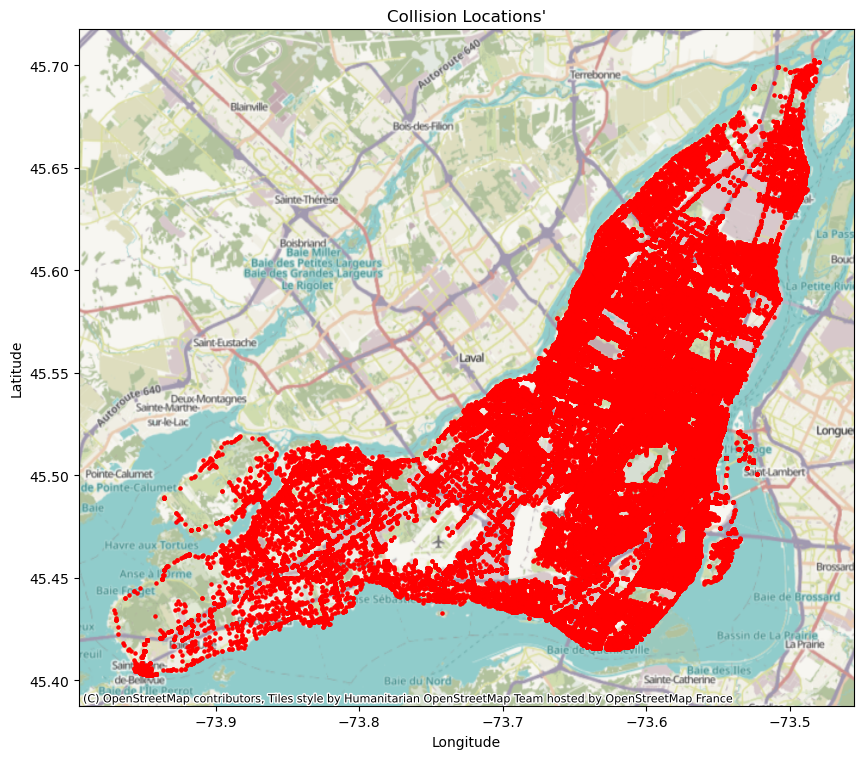

In [23]:
# Plot all the longtitude and latitude on a map
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

gdf = gpd.GeoDataFrame(
    df_processed,
    geometry=gpd.points_from_xy(df_processed.LOC_LONG, df_processed.LOC_LAT),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(marker='o', color='red', markersize=5, ax=ax)
ctx.add_basemap(ax, crs=gdf.crs.to_string())
ax.set_title("Collision Locations'")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


Observation: It looks like that most accidents in Montreal between 2012 and 2021 are concentrated in the North, South and Center of the island.

##### Location of accidents where the victim died

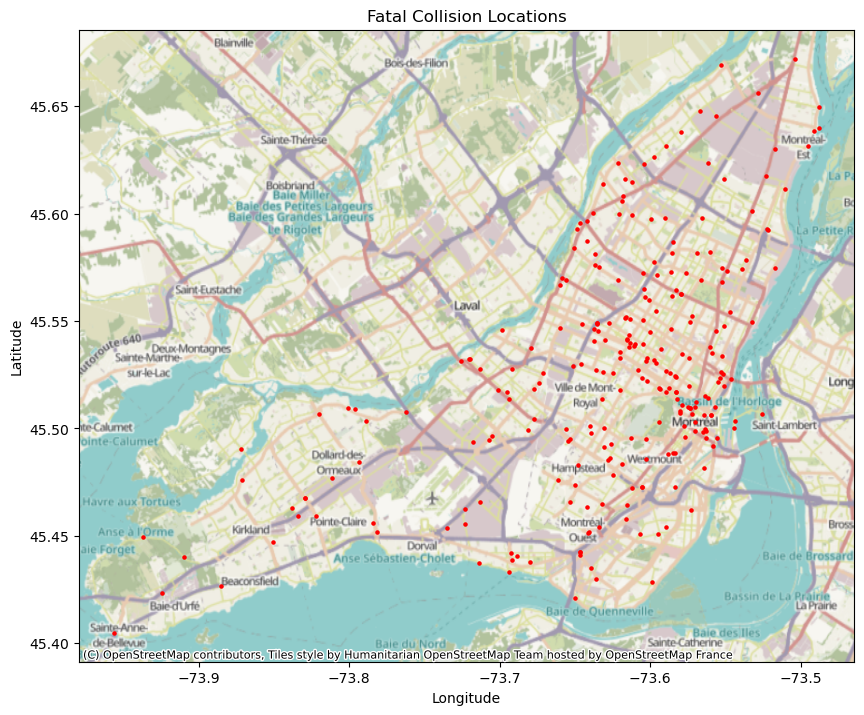

In [ ]:
# Filter the DataFrame to include only fatal accidents
df_mortel = df_processed[df_processed['GRAVITE'] == 'Mortel']

# Check if the filtered DataFrame is empty
if df_mortel.empty:
    print("No fatal accidents found in the DataFrame. No map will be generated.")
else:
    # Create a GeoDataFrame from the filtered data
    gdf_mortel = gpd.GeoDataFrame(
        df_mortel,
        geometry=gpd.points_from_xy(df_mortel.LOC_LONG, df_mortel.LOC_LAT),
        crs="EPSG:4326"
    )

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_mortel.plot(marker='o', color='red', markersize=5, ax=ax)
    ctx.add_basemap(ax, crs=gdf_mortel.crs.to_string())
    ax.set_title("Fatal Collision Locations")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    plt.show()

##### Location of accidents where Pedestrian is the victim

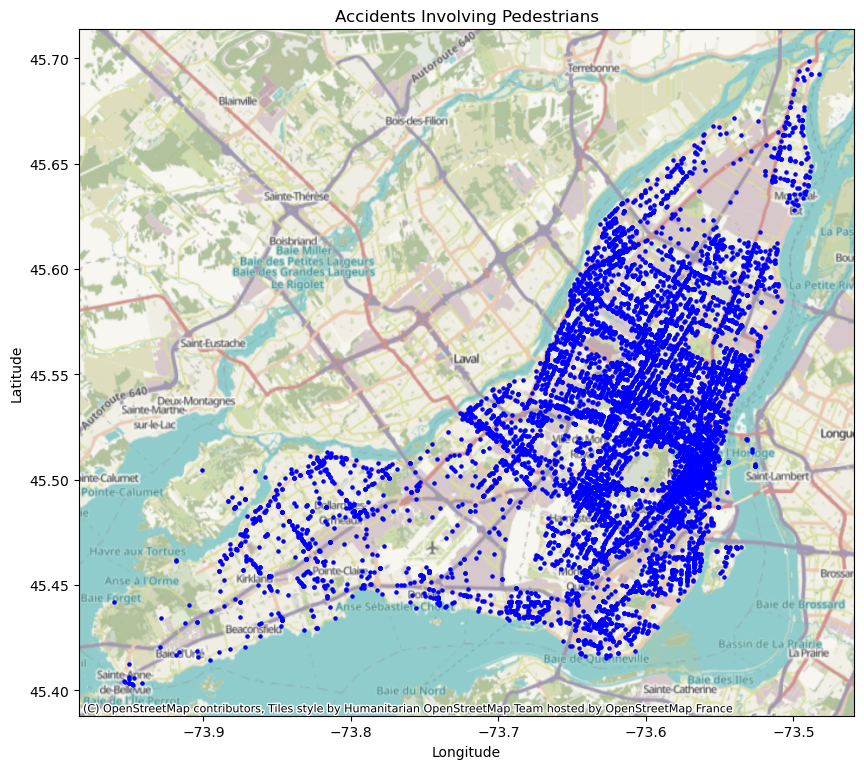

In [ ]:

# Filter the DataFrame to include only accidents where a pedestrian was involved
df_pedestrian = df_processed[(df_processed['NB_DECES_PIETON'] > 0) | (df_processed['NB_BLESSES_PIETON'] > 0)]

# Check if the filtered DataFrame is empty
if df_pedestrian.empty:
    print("No accidents involving pedestrians found in the DataFrame. No map will be generated.")
else:
    # Create a GeoDataFrame from the filtered data
    gdf_pedestrian = gpd.GeoDataFrame(
        df_pedestrian,
        geometry=gpd.points_from_xy(df_pedestrian.LOC_LONG, df_pedestrian.LOC_LAT),
        crs="EPSG:4326"
    )

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_pedestrian.plot(marker='o', color='blue', markersize=5, ax=ax)
    ctx.add_basemap(ax, crs=gdf_pedestrian.crs.to_string())
    ax.set_title("Accidents Involving Pedestrians")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    plt.show()

It is observed that most accidents involving pedestrians is centered downtown.

#####  Location of accident involving pedestrian leading to death

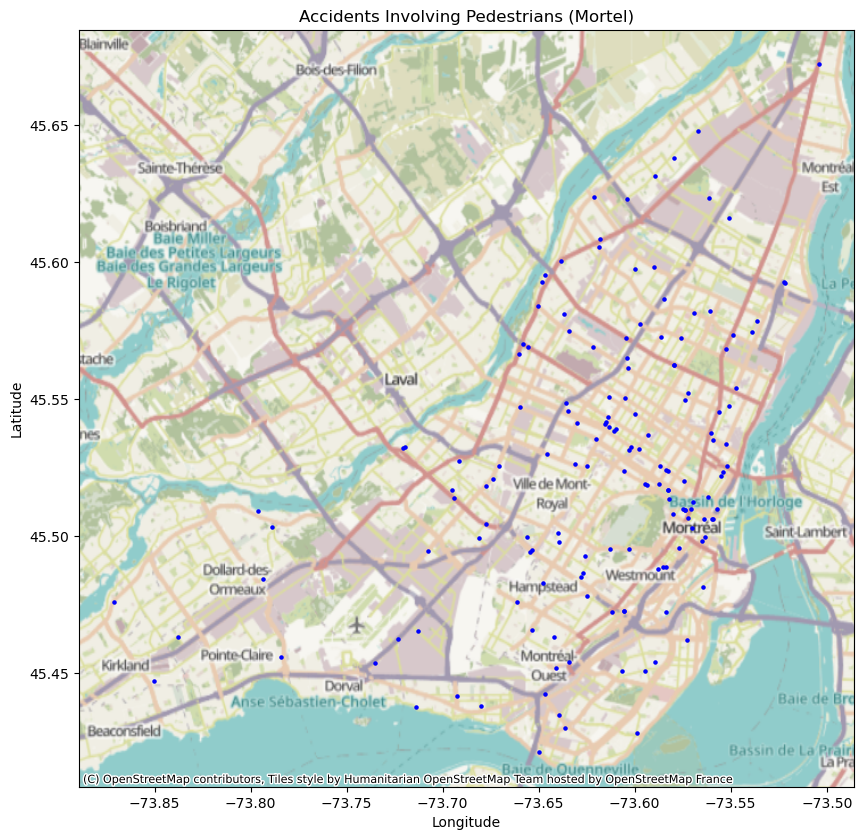

In [31]:

# Filter the DataFrame to include only accidents where a pedestrian was involved
df_pedestrian_mortel = df_processed[(df_processed['GRAVITE'] == 'Mortel') & ((df_processed['NB_DECES_PIETON'] > 0) | (df_processed['NB_BLESSES_PIETON'] > 0))]

# Check if the filtered DataFrame is empty
if df_pedestrian_mortel.empty:
    print("No accidents involving pedestrians (Mortel) found in the DataFrame. No map will be generated.")
else:
    # Create a GeoDataFrame from the filtered data
    gdf_pedestrian_mortel = gpd.GeoDataFrame(
        df_pedestrian_mortel,
        geometry=gpd.points_from_xy(df_pedestrian_mortel.LOC_LONG, df_pedestrian_mortel.LOC_LAT),
        crs="EPSG:4326"
    )

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_pedestrian_mortel.plot(marker='o', color='blue', markersize=5, ax=ax)
    ctx.add_basemap(ax, crs=gdf_pedestrian_mortel.crs.to_string())
    ax.set_title("Accidents Involving Pedestrians (Mortel)")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    plt.show()

##### Location of accidents where cyclist is the victim

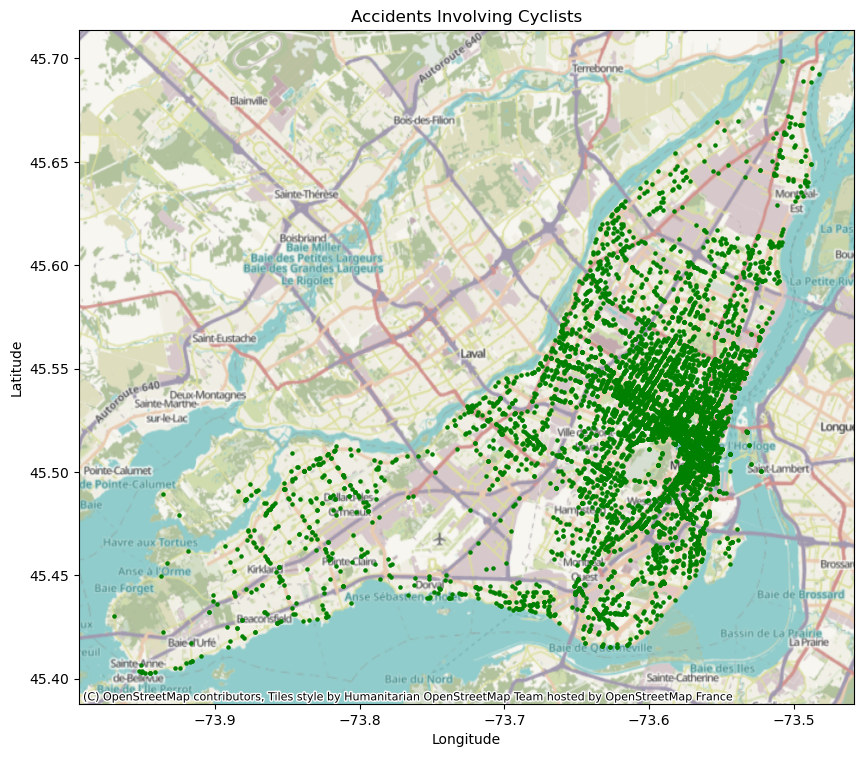

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Filter the DataFrame to include only accidents where a cyclist was involved
df_cyclist = df_processed[(df_processed['NB_DECES_VELO'] > 0) | (df_processed['NB_BLESSES_VELO'] > 0)]

# Check if the filtered DataFrame is empty
if df_cyclist.empty:
    print("No accidents involving cyclists found in the DataFrame. No map will be generated.")
else:
    # Create a GeoDataFrame from the filtered data
    gdf_cyclist = gpd.GeoDataFrame(
        df_cyclist,
        geometry=gpd.points_from_xy(df_cyclist.LOC_LONG, df_cyclist.LOC_LAT),
        crs="EPSG:4326"
    )

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_cyclist.plot(marker='o', color='green', markersize=5, ax=ax)
    ctx.add_basemap(ax, crs=gdf_cyclist.crs.to_string())
    ax.set_title("Accidents Involving Cyclists")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    plt.show()

It is observed that most accident involving cyclist is centered downtown.

##### Location of accidents where cyclist is involved leading to death

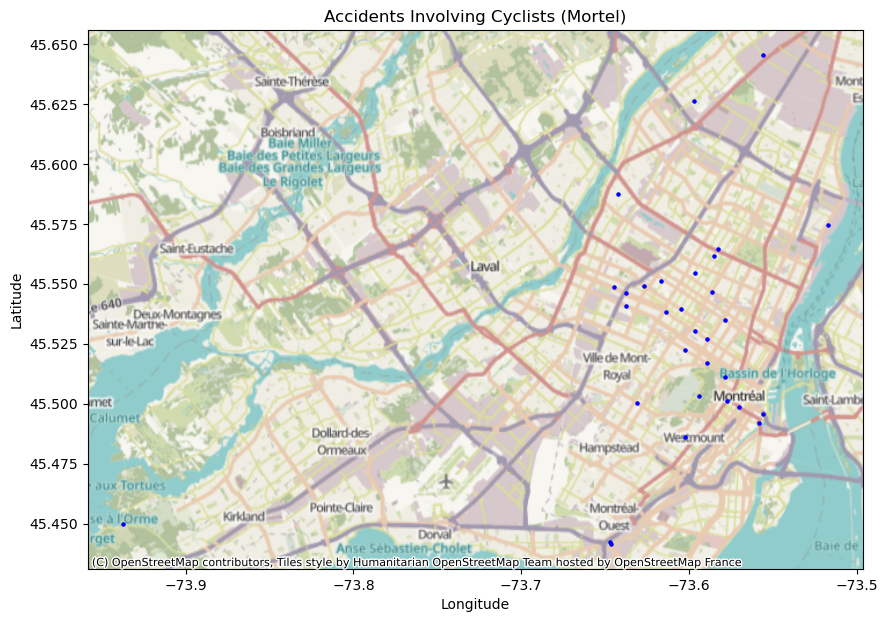

In [32]:
# Filter the DataFrame to include only accidents where a cyclist was involved
df_cyclist_mortel = df_processed[(df_processed['GRAVITE'] == 'Mortel') & ((df_processed['NB_DECES_VELO'] > 0) | (df_processed['NB_BLESSES_VELO'] > 0))]

# Check if the filtered DataFrame is empty
if df_cyclist_mortel.empty:
    print("No accidents involving cyclists (Mortel) found in the DataFrame. No map will be generated.")
else:
    # Create a GeoDataFrame from the filtered data
    gdf_cyclist_mortel = gpd.GeoDataFrame(
        df_cyclist_mortel,
        geometry=gpd.points_from_xy(df_cyclist_mortel.LOC_LONG, df_cyclist_mortel.LOC_LAT),
        crs="EPSG:4326"
    )

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_cyclist_mortel.plot(marker='o', color='blue', markersize=5, ax=ax)
    ctx.add_basemap(ax, crs=gdf_cyclist_mortel.crs.to_string())
    ax.set_title("Accidents Involving Cyclists (Mortel)")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    plt.show()

#### Analysis by victim category

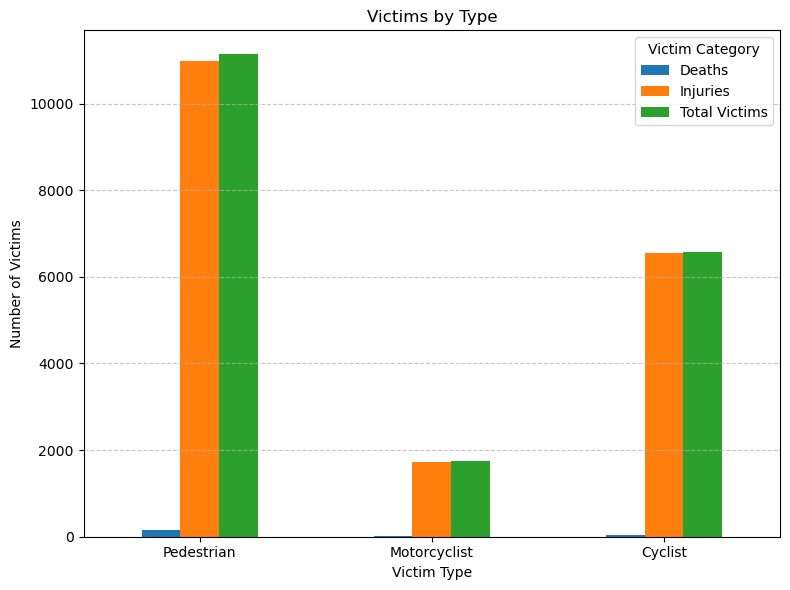

In [60]:
# List the columns for plotting
victim_cols = [
    'NB_DECES_PIETON', 'NB_BLESSES_PIETON', 'NB_VICTIMES_PIETON',
    'NB_DECES_MOTO', 'NB_BLESSES_MOTO', 'NB_VICTIMES_MOTO',
    'NB_DECES_VELO', 'NB_BLESSES_VELO', 'NB_VICTIMES_VELO'
]

# Calculate the sum for each column
victim_data = df_processed[victim_cols].sum()

# Create a new DataFrame for easier plotting
victim_df = pd.DataFrame({
    'Deaths': [victim_data['NB_DECES_PIETON'], victim_data['NB_DECES_MOTO'], victim_data['NB_DECES_VELO']],
    'Injuries': [victim_data['NB_BLESSES_PIETON'], victim_data['NB_BLESSES_MOTO'], victim_data['NB_BLESSES_VELO']],
    'Total Victims': [victim_data['NB_VICTIMES_PIETON'], victim_data['NB_VICTIMES_MOTO'], victim_data['NB_VICTIMES_VELO']]
}, index=['Pedestrian', 'Motorcyclist', 'Cyclist'])

# Plotting the grouped bar chart
victim_df.plot(kind='bar', figsize=(8, 6))
plt.title('Victims by Type')
plt.xlabel('Victim Type')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0)
plt.legend(title='Victim Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observation: Most of the victims are Pedestrian (aprox. 110k), followed by Cyclist (aprox. 65k) and then Motorcyclist (aprox. 18k) which all result in injuries majority of the time compare to death.

The observation provides insight into the vulnerability of different road users and the severity of the accidents they are involved in.

Analysis of the Observation
 - Ranking of Victims: The observation that pedestrians are the most common victims, followed by cyclists, and then motorcyclists, directly reflects the relative vulnerability of these groups. Pedestrians and cyclists lack the protective structure of a vehicle, making them more susceptible to injury in a collision. This ranking underscores the critical need for safety measures that protect the most exposed road users.

 - Injuries vs. Deaths: The fact that the majority of incidents for all three groups result in injuries rather than deaths is significant. This could indicate that many collisions are occurring at lower speeds or that improvements in vehicle safety, protective gear, and emergency medical services are helping to prevent fatal outcomes. While any accident is serious, the data suggests that these incidents, while frequent, are not always resulting in the most severe outcome.

In [82]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218234 entries, 0 to 218233
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VITESSE_AUTOR                218234 non-null  float64
 1   CD_CONFG_ROUTE               218234 non-null  float64
 2   CD_ETAT_CHASS                218234 non-null  float64
 3   CD_ETAT_SURFC                218234 non-null  float64
 4   CD_ECLRM                     218234 non-null  float64
 5   CD_ENVRN_ACCDN               218234 non-null  float64
 6   CD_CATEG_ROUTE               218234 non-null  float64
 7   CD_ASPCT_ROUTE               218234 non-null  float64
 8   CD_LOCLN_ACCDN               218234 non-null  float64
 9   CD_COND_METEO                218234 non-null  float64
 10  TP_REPRR_ACCDN               218234 non-null  float64
 11  CD_GENRE_ACCDN               218234 non-null  float64
 12  JR_SEMN_ACCDN                218234 non-null  object 
 13 

#### Analysis of Dependent variable

In [61]:
# Exploring Target variable (Gravite = Severity)
df_processed['GRAVITE'].unique()

array(['Dommages matériels inférieurs au seuil de rapportage',
       'Dommages matériels seulement', 'Léger', 'Grave', 'Mortel'],
      dtype=object)

In [62]:
# Get counts
counts = df_processed['GRAVITE'].value_counts()
print(counts)

GRAVITE
Dommages matériels inférieurs au seuil de rapportage    87051
Dommages matériels seulement                            83219
Léger                                                   45916
Grave                                                    1785
Mortel                                                    263
Name: count, dtype: int64


### Exploring the dataset

In [29]:
pip install textwrap3

Note: you may need to restart the kernel to use updated packages.


C:\Users\rafal\AppData\Local\Temp\ipykernel_29004\1099336233.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


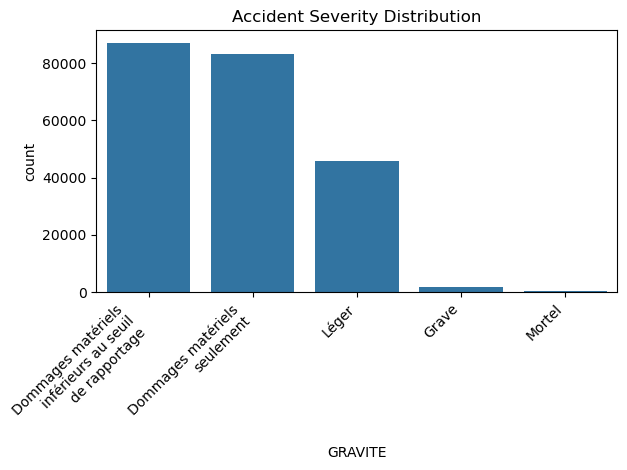

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap3

#Accident Severity
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap3.fill(text, width=width, break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=45, ha='right')

ax = sns.countplot(x='GRAVITE', data=df_processed)
wrap_labels(ax, 20)

plt.title("Accident Severity Distribution")
plt.tight_layout()
plt.show()

Observation: 
The number of accident which resulted in no 'injuries below reporting threshold' and 'Mategial damage only' is significantly higher than the number of accidents which resulted in injuries or fatalities. 
This make sense because we are examining a dataset which exclude collisions that happened on highway network. 

#### Analysis of accident by Month and Year

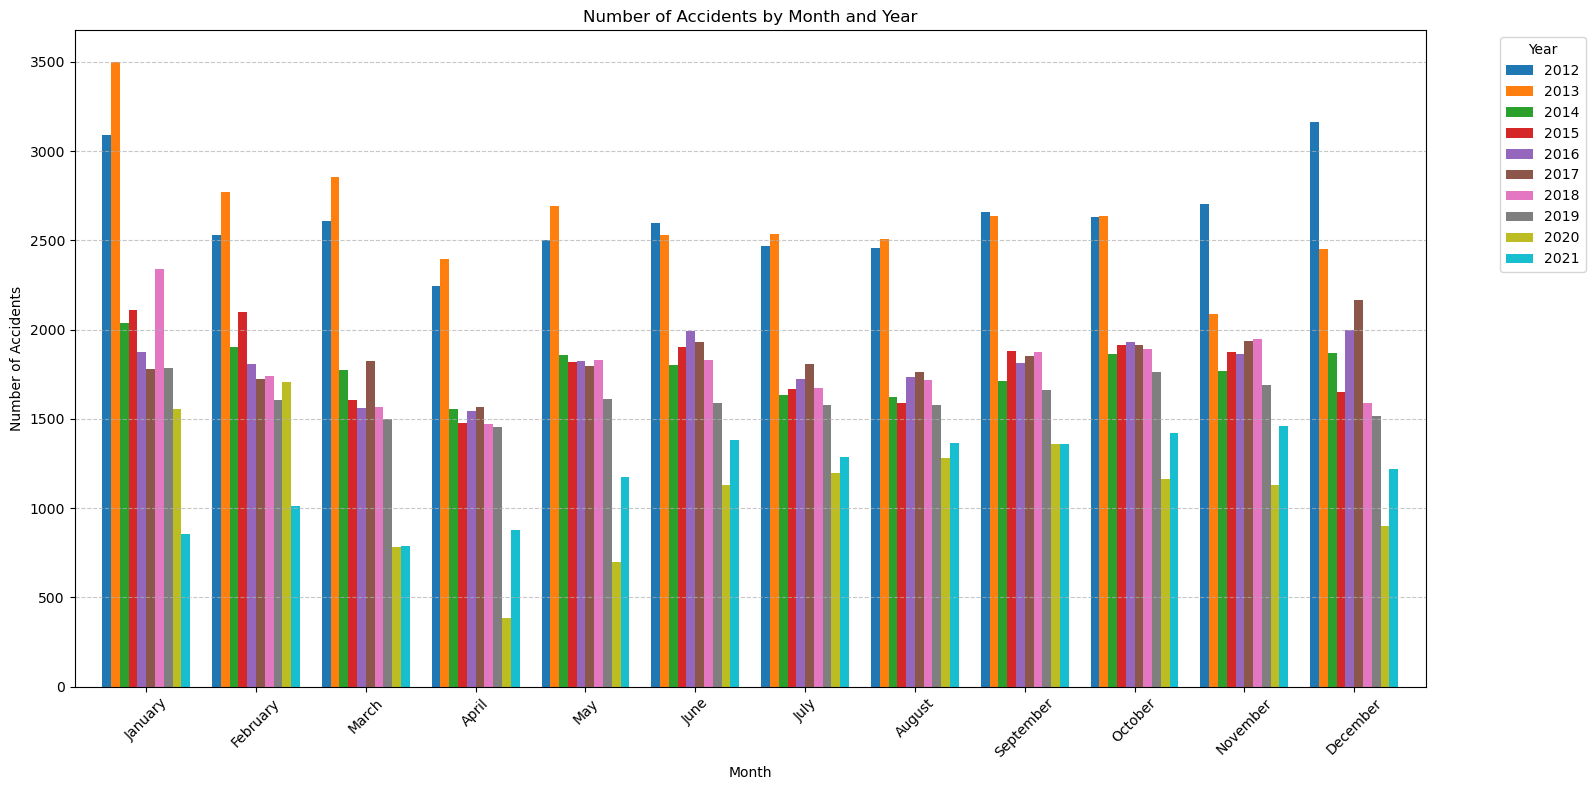

In [110]:
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by year and month
grouped_data = df_cleaned.groupby(['ACCDN_YEAR', 'ACCDN_MONTH']).size().reset_index(name='Accident_Count')

# Pivot the data for easier plotting
pivot_table = grouped_data.pivot(index='ACCDN_MONTH', columns='ACCDN_YEAR', values='Accident_Count')

# Plot the grouped bar chart
ax = pivot_table.plot(kind='bar', figsize=(16, 8), width=0.8)  # Increase bar width and reduce space

# Customize x-axis
ax.set_xticklabels([calendar.month_name[i] for i in range(1, 13)], rotation=45)

plt.title('Number of Accidents by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Weather conditions during accidents

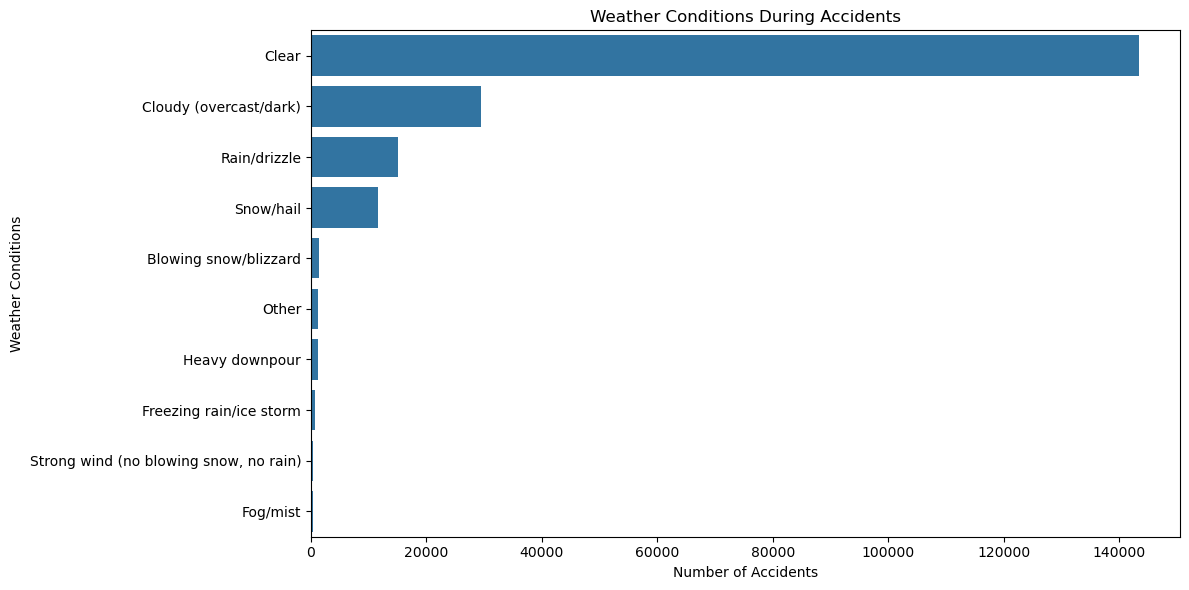

In [ ]:
# Weather conditions during accidents
legend_map = {
    11: 'Clear',
    12: 'Cloudy (overcast/dark)',
    13: 'Fog/mist',
    14: 'Rain/drizzle',
    15: 'Heavy downpour',
    16: 'Strong wind (no blowing snow, no rain)',
    17: 'Snow/hail',
    18: 'Blowing snow/blizzard',
    19: 'Freezing rain/ice storm',
    99: 'Other'
}

# Create a new column with the English descriptions
df_processed['CD_COND_METEO_EN'] = df_processed['CD_COND_METEO'].map(legend_map)

# Create the countplot using the new column with English labels
plt.figure(figsize=(12,6))
sns.countplot(y='CD_COND_METEO_EN', data=df_processed, order=df_processed['CD_COND_METEO_EN'].value_counts().index)
plt.title("Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Conditions")
plt.tight_layout()
plt.show()

Weather conditions codes and their meanings
 - 11 - Clair (Clear)
 - 12 - Couvert (nuageux/sombre) (Cloudy (overcast/dark))
 - 13 - Brouillard/brume (Fog/mist)
 - 14 - Pluie/bruine (Rain/drizzle)
 - 15 - Averse (pluie forte) (Heavy downpour)
 - 16 - Vent fort (pas de poudrerie, pas de pluie) (Strong wind (no blowing snow, no rain))
 - 17 - Neige/grêle (Snow/hail)
 - 18 - Poudrerie/tempête de neige (Blowing snow/blizzard)
 - 19 - Verglas (Freezing rain/ice storm)
 - 99 - Autre (Other)

Observation: most accident occurs during clear weather condition which could be because there a more traffic as more people go out when the weather is clear. 
There are also a high volume of accident when the weather is overcast/dark/cloudy which could be due to low visibility.


#### Days of the week

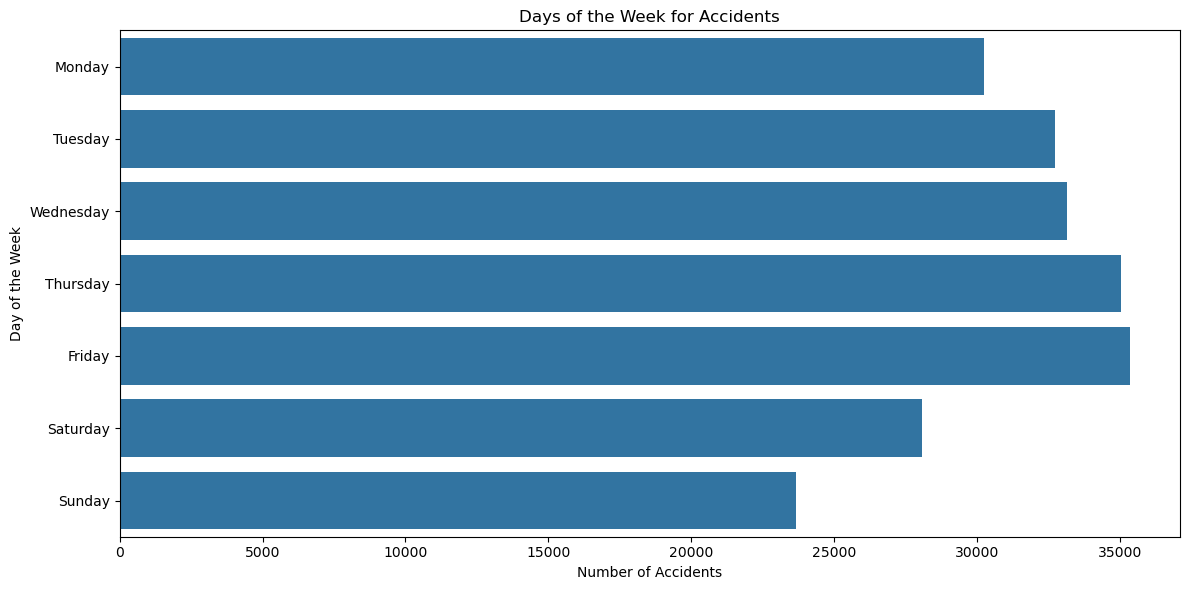

In [87]:
# Days of the week
legend_map = {
    'DI': 'Sunday',
    'LU': 'Monday',
    'MA': 'Tuesday',
    'ME': 'Wednesday',
    'JE': 'Thursday',
    'VE': 'Friday',
    'SA': 'Saturday'
}

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a new column with the English day names
df_processed['JR_SEMN_ACCDN_EN'] = df_processed['JR_SEMN_ACCDN'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,6))
sns.countplot(y='JR_SEMN_ACCDN_EN', data=df_processed, order=day_order)
plt.title("Days of the Week for Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()

- DI - Dimanche (Sunday)
- LU - Lundi (Monday)
- MA - Mardi (Tuesday)
- ME - Mercredi (Wednesday)
- JE - Jeudi (Thursday)
- VE - Vendredi (Friday)
- SA - Samedi (Saturday)

Observation: Less accidents occur during the weekend (Saturday and Sunday) compared to weekdays (Monday to Friday). This could be due to lower traffic volumes on weekends, as many people are not commuting to work or school. 

#### Type of Accidents

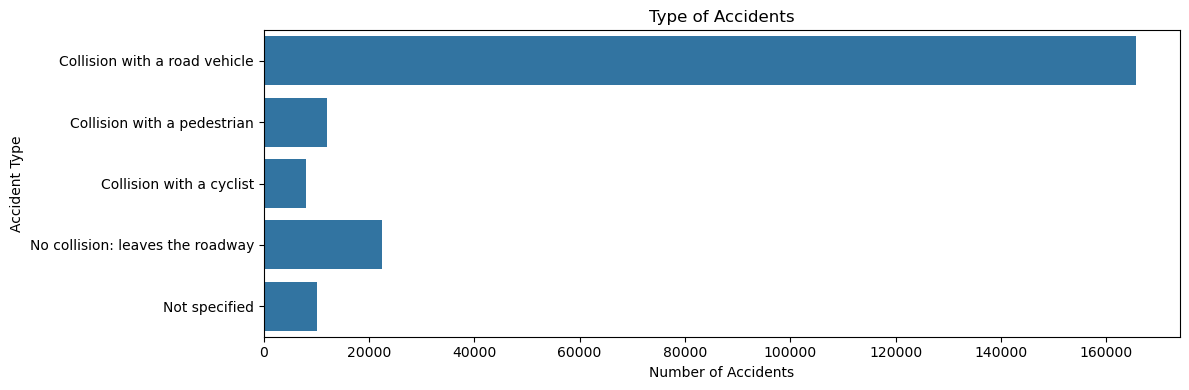

In [106]:
# Type of Accidents
legend_map = {
    31: 'Collision with a road vehicle',
    32: 'Collision with a pedestrian',
    33: 'Collision with a cyclist',
    99: 'No collision: leaves the roadway',
    0: 'Not specified'
}

# Define a logical order for the bars
label_order = ['Collision with a road vehicle', 'Collision with a pedestrian',
               'Collision with a cyclist', 'No collision: leaves the roadway',
               'Not specified']

# Create a new column with the English descriptions
df_processed['CD_GENRE_ACCDN_EN'] = df_processed['CD_GENRE_ACCDN'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,4))
sns.countplot(y='CD_GENRE_ACCDN_EN', data=df_processed, order=label_order)
plt.title("Type of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Accident Type")
plt.tight_layout()
plt.show()

- 31 - Collision avec véhicule routier (Collision with a road vehicle)
- 32 - Collision avec piéton (Collision with a pedestrian)
- 33 - Collision avec cycliste (Collision with a cyclist)
- 99 - Sans collision: quitte la chaussée (No collision: leaves the roadway)
- 0  - Non précisé (Not specified)

Observation: Most accident occurs with a road vehicle, followed by collisions with pedestrians and cyclists. This suggests that road safety measures should focus on reducing collisions involving vehicles, pedestrians, and cyclists. 

#### Condition of the road surface at the time of the accident.

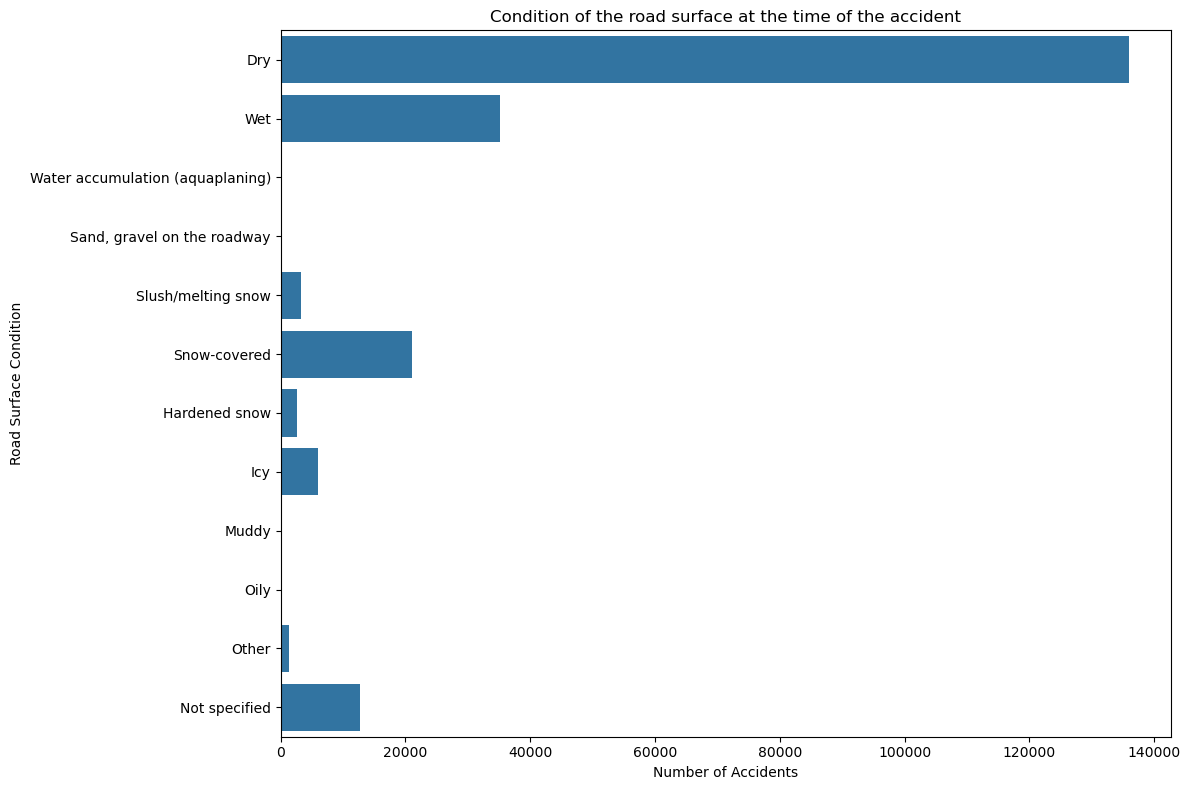

In [93]:
# Condition of the road surface at the time of the accident.
legend_map = {
    11: 'Dry',
    12: 'Wet',
    13: 'Water accumulation (aquaplaning)',
    14: 'Sand, gravel on the roadway',
    15: 'Slush/melting snow',
    16: 'Snow-covered',
    17: 'Hardened snow',
    18: 'Icy',
    19: 'Muddy',
    20: 'Oily',
    99: 'Other',
    0: 'Not specified'
}

# Define a logical order for the bars
label_order = ['Dry', 'Wet', 'Water accumulation (aquaplaning)', 'Sand, gravel on the roadway',
               'Slush/melting snow', 'Snow-covered', 'Hardened snow', 'Icy', 'Muddy',
               'Oily', 'Other', 'Not specified']

# Create a new column with the English descriptions
df_processed['CD_ETAT_SURFC_EN'] = df_processed['CD_ETAT_SURFC'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,8))
sns.countplot(y='CD_ETAT_SURFC_EN', data=df_processed, order=label_order)
plt.title("Condition of the road surface at the time of the accident")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Surface Condition")
plt.tight_layout()
plt.show()

- 11 - Sèche (Dry)
- 12 - Mouillée (Wet)
- 13 - Accumulation d’eau (aquaplanage) (Water accumulation (aquaplaning))
- 14 - Sable, gravier sur la chaussée (Sand, gravel on the roadway)
- 15 - Gadoue/neige fondante (Slush/melting snow)
- 16 - Enneigée (Snow-covered)
- 17 - Neige durcie (Hardened snow)
- 18 - Glacée (Icy)
- 19 - Boueuse (Muddy)
- 20 - Huileuse (Oily)
- 99 - Autre (Other)
- 0 - Non précisé (Not specified)

Observation: Most accident occured when the road surface is dry as there are high traffic. Followed by when the road surface is wet and covered with snow.


#### Degree of brightness of the scene at the time of the accident.

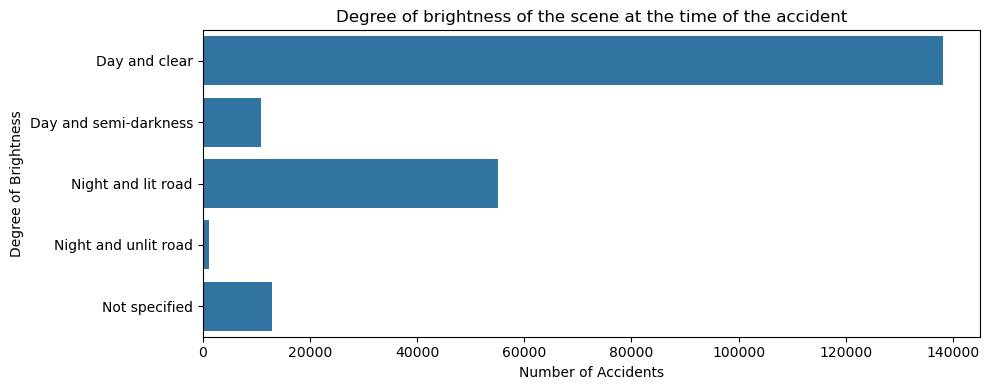

In [90]:
# Degree of brightness of the scene at the time of the accident.
legend_map = {
    1: 'Day and clear',
    2: 'Day and semi-darkness',
    3: 'Night and lit road',
    4: 'Night and unlit road',
    0: 'Not specified'
}

# Define the order for the bars, based on the codes
label_order = ['Day and clear', 'Day and semi-darkness', 'Night and lit road', 'Night and unlit road', 'Not specified']

# Create a new column with the English descriptions
df_processed['CD_ECLRM_EN'] = df_processed['CD_ECLRM'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(10,4))
sns.countplot(y='CD_ECLRM_EN', data=df_processed, order=label_order)
plt.title("Degree of brightness of the scene at the time of the accident")
plt.xlabel("Number of Accidents")
plt.ylabel("Degree of Brightness")
plt.tight_layout()
plt.show()

- 1 - Jour et clarté (Day and clear)
- 2 - Jour et demi-obscurité (Day and semi-darkness)
- 3 - Nuit et chemin éclairé (Night and lit road)
- 4 - Nuit et chemin non éclairé (Night and unlit road)
- 0 - Non précisé (Not specified)

Observation: Most accident occur when the degree of brightness is 'day and clear' followed by 'Night and lit road'. Which could be explain by the fact that people tends to drive faster during broad daylight and when the road is lit.

#### Environment: Dominant activity in the sector where the accident occurred.

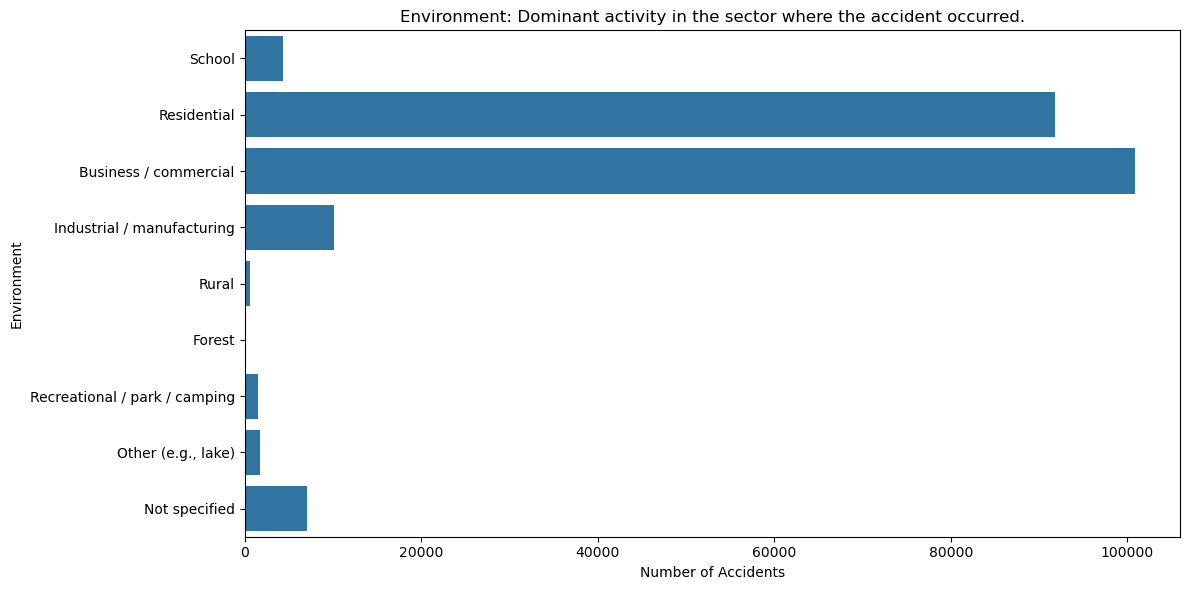

In [94]:
# Environment: Dominant activity in the sector where the accident occurred.
legend_map = {
    1: 'School',
    2: 'Residential',
    3: 'Business / commercial',
    4: 'Industrial / manufacturing',
    5: 'Rural',
    6: 'Forest',
    7: 'Recreational / park / camping',
    9: 'Other (e.g., lake)',
    0: 'Not specified'
}

# Define a logical order for the bars
label_order = ['School', 'Residential', 'Business / commercial', 'Industrial / manufacturing',
               'Rural', 'Forest', 'Recreational / park / camping', 'Other (e.g., lake)', 'Not specified']

# Create a new column with the English descriptions
df_processed['CD_ENVRN_ACCDN_EN'] = df_processed['CD_ENVRN_ACCDN'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,6))
sns.countplot(y='CD_ENVRN_ACCDN_EN', data=df_processed, order=label_order)
plt.title("Environment: Dominant activity in the sector where the accident occurred.")
plt.xlabel("Number of Accidents")
plt.ylabel("Environment")
plt.tight_layout()
plt.show()

- 1 - Scolaire (School)
- 2 - Résidentiel (Residential)
- 3 - Affaires / commercial (Business / commercial)
- 4 - Industriel / manufacturier (Industrial / manufacturing)
- 5 - Rural (Rural)
- 6 - Forestier (Forest)
- 7 - Récréatif / parc / camping (Recreational / park / camping)
- 9 - Autre (ex. lac) (Other (e.g., lake))
- 0 - Non précisé (Not specified)

Observation: Most accident occurs in sectors like Business/commercial and Residential areas. This is due to the fact that there are more traffic in these sectors.

#### Category of road on which the first physical event (impact) occurred

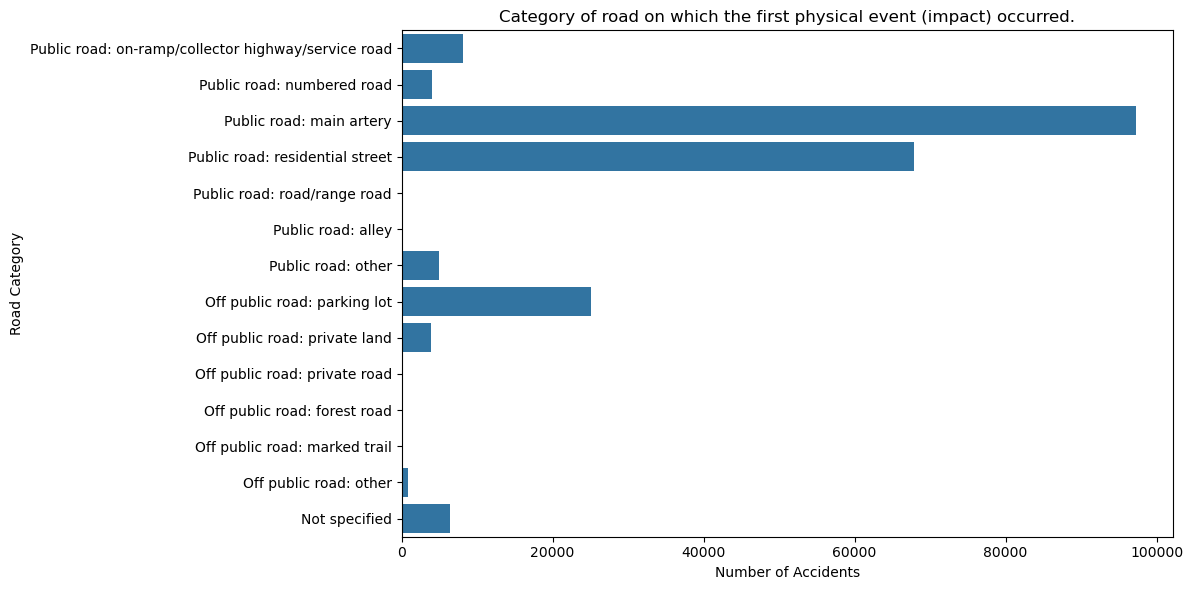

In [97]:
# Category of road on which the first physical event (impact) occurred
legend_map = {
    11: 'Public road: on-ramp/collector highway/service road',
    12: 'Public road: numbered road',
    13: 'Public road: main artery',
    14: 'Public road: residential street',
    15: 'Public road: road/range road',
    16: 'Public road: alley',
    19: 'Public road: other',
    21: 'Off public road: parking lot',
    22: 'Off public road: private land',
    23: 'Off public road: private road',
    24: 'Off public road: forest road',
    25: 'Off public road: marked trail',
    29: 'Off public road: other',
    0: 'Not specified'
}

# Define a logical order for the bars
label_order = ['Public road: on-ramp/collector highway/service road',
               'Public road: numbered road',
               'Public road: main artery',
               'Public road: residential street',
               'Public road: road/range road',
               'Public road: alley',
               'Public road: other',
               'Off public road: parking lot',
               'Off public road: private land',
               'Off public road: private road',
               'Off public road: forest road',
               'Off public road: marked trail',
               'Off public road: other',
               'Not specified']

# Create a new column with the English descriptions
df_processed['CD_CATEG_ROUTE_EN'] = df_processed['CD_CATEG_ROUTE'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,6))
sns.countplot(y='CD_CATEG_ROUTE_EN', data=df_processed, order=label_order)
plt.title("Category of road on which the first physical event (impact) occurred.")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Category")
plt.tight_layout()
plt.show()

- 11 - Chemin public: bretelle/collecteur d’autoroute/voie de service (Public road: on-ramp/collector highway/service road)
- 12 - Chemin public: route numérotée (Public road: numbered road)
- 13 - Chemin public: artère principale (Public road: main artery)
- 14 - Chemin public: rue résidentielle (Public road: residential street)
- 15 - Chemin public: chemin/rang (Public road: road/range road)
- 16 - Chemin public: ruelle (Public road: alley)
- 19 - Chemin public: autre (Public road: other)
- 21 - Hors chemin public: terrain de stationnement (Off public road: parking lot)
- 22 - Hors chemin public: terrain privé (Off public road: private land)
- 23 - Hors chemin public: chemin privé (Off public road: private road)
- 24 - Hors chemin public: chemin forestier (Off public road: forest road)
- 25 - Hors chemin public: sentier balisé (Off public road: marked trail)
- 29 - Hors chemin public: autre (Off public road: other)
- 0 - Non précisé (Not specified)

Based on the observation that most accidents occur on 'Public road: main artery' and 'Public road: residential street', the observation highlights that accidents are most common on two very different types of roads, each with its own set of risk factors.

Public Road: Main Artery
These roads are typically high-risk due to several factors:
 - High traffic volume, which increases the statistical probability of a collision.
 - Higher speeds, which reduce reaction time and increase the severity of accidents.
 - Complex interactions at intersections, merging points, and off-ramps.

Public Road: Residential Street
Accidents on these streets are often tied to:
 - The presence of vulnerable road users, such as pedestrians, children, and cyclists.
 - Unique hazards like parked cars, driveways, and limited sightlines, which can create blind spots.
 - Driver inattention, as motorists may be less vigilant on familiar, lower-speed roads.

The finding suggests that accidents are not confined to a single type of risky environment but are frequent in areas defined by high traffic flow and speed as well as areas defined by the presence of vulnerable users and complex local hazards.

#### Road conditions at the scene of the accident and in its immediate surroundings.

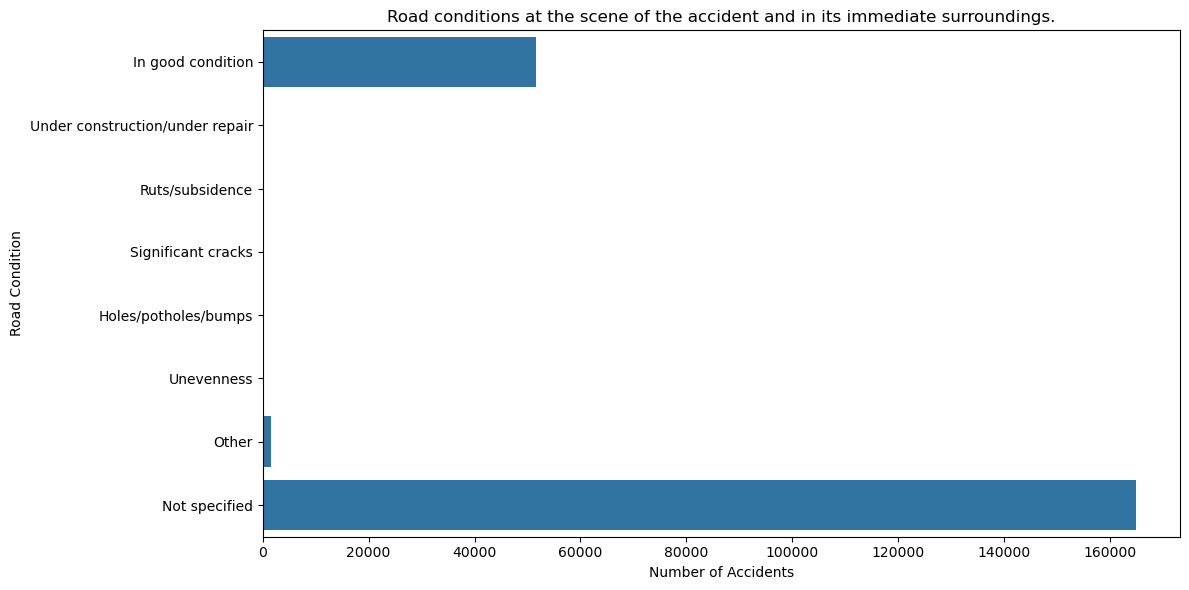

In [98]:
# Road conditions at the scene of the accident and in its immediate surroundings.

legend_map = {
    1: 'In good condition',
    2: 'Under construction/under repair',
    3: 'Ruts/subsidence',
    4: 'Significant cracks',
    5: 'Holes/potholes/bumps',
    6: 'Unevenness',
    9: 'Other',
    0: 'Not specified'
}

# Define a logical order for the bars
label_order = ['In good condition', 'Under construction/under repair', 'Ruts/subsidence',
               'Significant cracks', 'Holes/potholes/bumps', 'Unevenness', 'Other', 'Not specified']

# Create a new column with the English descriptions
df_processed['CD_ETAT_CHASS_EN'] = df_processed['CD_ETAT_CHASS'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,6))
sns.countplot(y='CD_ETAT_CHASS_EN', data=df_processed, order=label_order)
plt.title("Road conditions at the scene of the accident and in its immediate surroundings.")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Condition")
plt.tight_layout()
plt.show()

- 1 - En bon état (In good condition)
- 2 - En construction/en réparation (Under construction/under repair)
- 3 - Ornières/affaissements (Ruts/subsidence)
- 4 - Fissures importantes (Significant cracks)
- 5 - Trous/nids-de-poule/cahots (Holes/potholes/bumps)
- 6 - Dénivellation (Unevenness)
- 9 - Autre (Other)
- 0 - Non précisé (Not specified)

Observation:
 - Impact of Missing Data: The large number of "Not specified" values introduces a significant data bias. It's impossible to know if the accidents in this category happened on good roads, poor roads, or if road condition was not a factor at all. This makes it difficult to draw a definitive conclusion about the true relationship between road condition and accidents.

 - Accidents on "Good Condition" Roads: The finding that most specified accidents occur on good roads is likely due to exposure. Most roads are maintained to be in good condition, meaning drivers spend the majority of their time on them. Therefore, a higher number of accidents would be statistically expected to occur on these roads. This also suggests that driver behavior, rather than the physical road condition, might be the primary cause of these accidents. On a road perceived as safe, drivers may be more prone to speeding or other forms of complacency.

#### Appearance of the road at the accident site at the time of impact

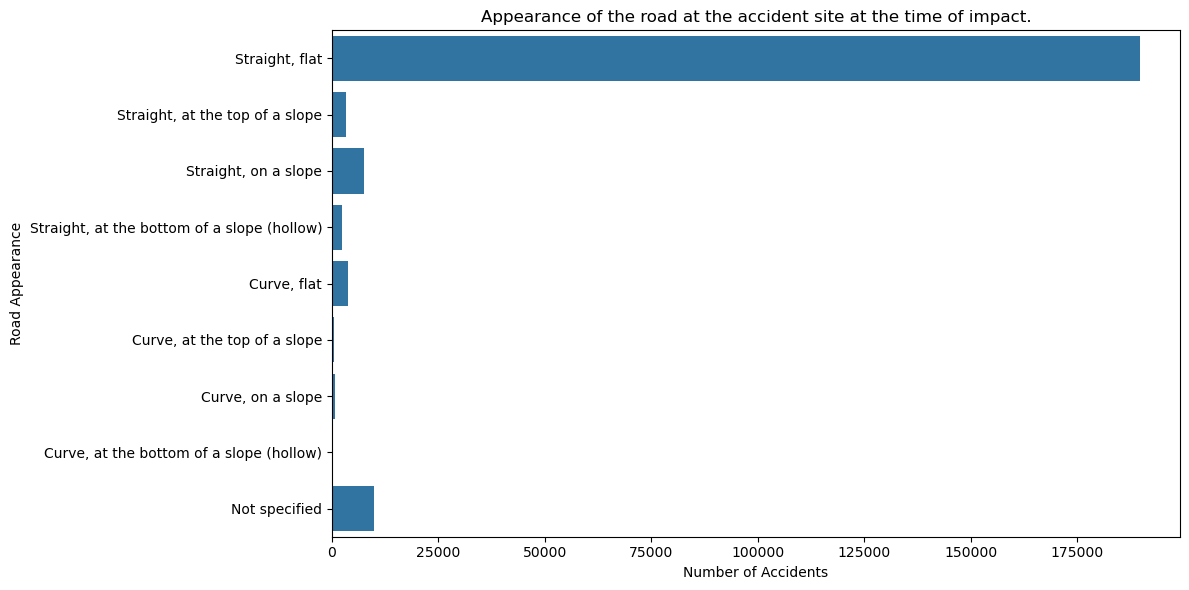

In [100]:
# Appearance of the road at the accident site at the time of impact and in its immediate surroundings based on the field
# of vision of a driver seated at the wheel of their vehicle.
legend_map = {
    11: 'Straight, flat',
    12: 'Straight, at the top of a slope',
    13: 'Straight, on a slope',
    14: 'Straight, at the bottom of a slope (hollow)',
    21: 'Curve, flat',
    22: 'Curve, at the top of a slope',
    23: 'Curve, on a slope',
    24: 'Curve, at the bottom of a slope (hollow)',
    0: 'Not specified'
}

# Define a logical order for the bars
label_order = ['Straight, flat', 'Straight, at the top of a slope', 'Straight, on a slope',
               'Straight, at the bottom of a slope (hollow)', 'Curve, flat',
               'Curve, at the top of a slope', 'Curve, on a slope',
               'Curve, at the bottom of a slope (hollow)', 'Not specified']

# Create a new column with the English descriptions
df_processed['CD_ASPCT_ROUTE_EN'] = df_processed['CD_ASPCT_ROUTE'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,6))
sns.countplot(y='CD_ASPCT_ROUTE_EN', data=df_processed, order=label_order)
plt.title("Appearance of the road at the accident site at the time of impact.")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Appearance")
plt.tight_layout()
plt.show()

- 11 - Droit, plat (Straight, flat)
- 12 - Droit, en haut de la pente (Straight, at the top of a slope)
- 13 - Droit, dans la pente (Straight, on a slope)
- 14 - Droit, en bas de la pente (creux) (Straight, at the bottom of a slope (hollow))
- 21 - Courbe, plat (Curve, flat)
- 22 - Courbe, en haut de la pente (Curve, at the top of a slope)
- 23 - Courbe, dans la pente (Curve, on a slope)
- 24 - Courbe, en bas de la pente (creux) (Curve, at the bottom of a slope (hollow))
- 0 - Non précisé (Not specified)

Based on the observation that most accidents occur on straight, flat roads, an exploratory analysis suggests several potential reasons:
 - Prevalence of Straight Roads: The vast majority of road networks consist of straight, flat sections. Statistically, there are simply more opportunities for accidents to happen on these types of roads compared to curves, hills, or intersections.
 - Driver Complacency and Inattention: The monotonous nature of a straight road can lead to driver complacency, increasing the likelihood of distractions such as using a phone, eating, or daydreaming. The lack of challenging features may cause drivers to relax their vigilance.
 - Speeding: Straight roads often allow drivers to feel safe traveling at higher speeds. Excessive speed is a major factor in accident severity and is frequently a contributing cause on these road types.
 - Types of Accidents: Common accidents on straight roads include rear-end collisions (due to inattention or following too closely) and head-on collisions (often from a driver crossing the centerline).

#### Longitudinal location (along the road) of the first physical event impact).

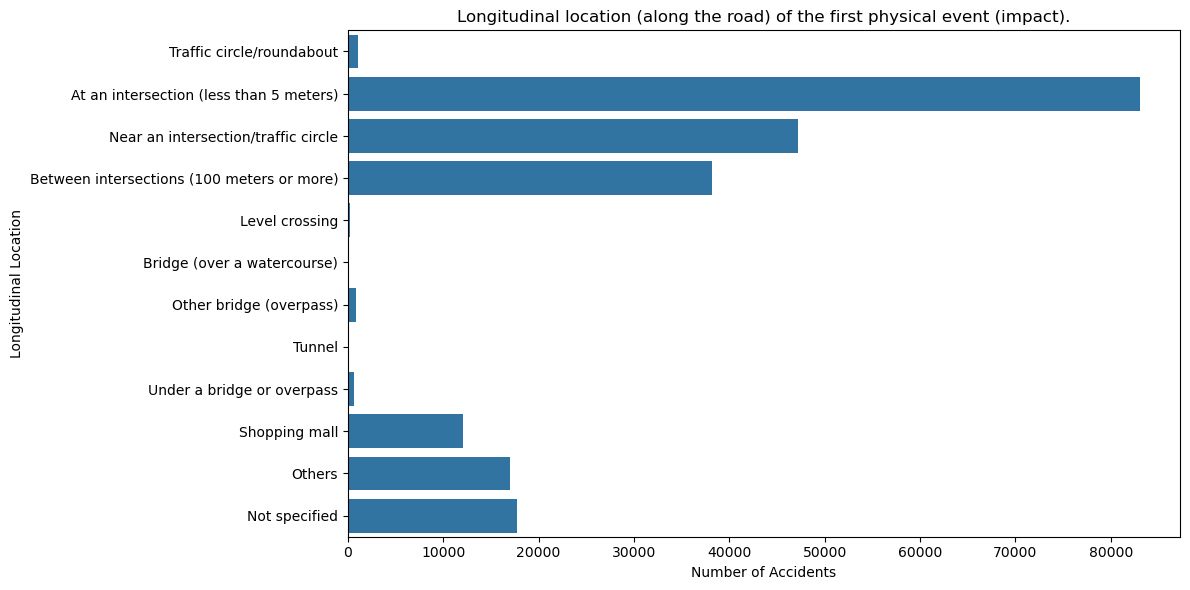

In [102]:
# Longitudinal location (along the road) of the first physical event impact).
legend_map = {
    31: 'Traffic circle/roundabout',
    32: 'At an intersection (less than 5 meters)',
    33: 'Near an intersection/traffic circle',
    34: 'Between intersections (100 meters or more)',
    35: 'Level crossing',
    36: 'Bridge (over a watercourse)',
    37: 'Other bridge (overpass)',
    38: 'Tunnel',
    39: 'Under a bridge or overpass',
    40: 'Shopping mall',
    99: 'Others',
    0: 'Not specified'
}

# Define a logical order for the bars
label_order = ['Traffic circle/roundabout', 'At an intersection (less than 5 meters)',
               'Near an intersection/traffic circle', 'Between intersections (100 meters or more)',
               'Level crossing', 'Bridge (over a watercourse)', 'Other bridge (overpass)',
               'Tunnel', 'Under a bridge or overpass', 'Shopping mall',
               'Others', 'Not specified']

# Create a new column with the English descriptions
df_processed['CD_LOCLN_ACCDN_EN'] = df_processed['CD_LOCLN_ACCDN'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,6))
sns.countplot(y='CD_LOCLN_ACCDN_EN', data=df_processed, order=label_order)
plt.title("Longitudinal location (along the road) of the first physical event (impact).")
plt.xlabel("Number of Accidents")
plt.ylabel("Longitudinal Location")
plt.tight_layout()
plt.show()

- 31 - Carrefour giratoire/rond-point (Traffic circle/roundabout)
- 32 - En intersection (moins de 5 mètres) (At an intersection (less than 5 meters))
- 33 - Près d’une intersection/carrefour giratoire (Near an intersection/traffic circle)
- 34 - Entre intersections (100 mètres et +) (Between intersections (100 meters or more))
- 35 - Passage à niveau (Level crossing)
- 36 - Pont (au-dessus d’un cours d’eau) (Bridge (over a watercourse))
- 37 - Autre pont (viaduc) (Other bridge (overpass))
- 38 - Tunnel (Tunnel)
- 39 - Sous un pont ou un viaduc (Under a bridge or overpass)
- 40 - Centre commercial (Shopping mall)
- 99 - Autres (Others)
- 0 - Non précisé (Not specified)

Observation: Most common location of accident is 'At an intersection - less than 5 meters' followed by 'Near an intersection/traffic circle' and 'Between intersections - 100 meters or more'

This hierarchy of accident locations implies a few key things about driver behavior and road infrastructure:
- Intersections are high-conflict zones. The top two categories both relate to intersections, highlighting them as major points of collision. Accidents within a few meters of an intersection often involve cross-traffic, turning vehicles, or improper lane changes.
- Driver behavior is a likely factor. This concentration of accidents suggests issues like driver inattention, failure to yield, running red lights, or misjudging speed and distance while approaching and navigating these complex areas.
- 'Between intersections' accidents are less frequent. The third-place ranking for accidents on straight stretches of road indicates that these areas, while not entirely safe, are less hazardous than the points where traffic streams converge. Accidents here may be more related to factors like speeding or distracted driving on open road segments.

#### Road configuration: Lane characteristics.

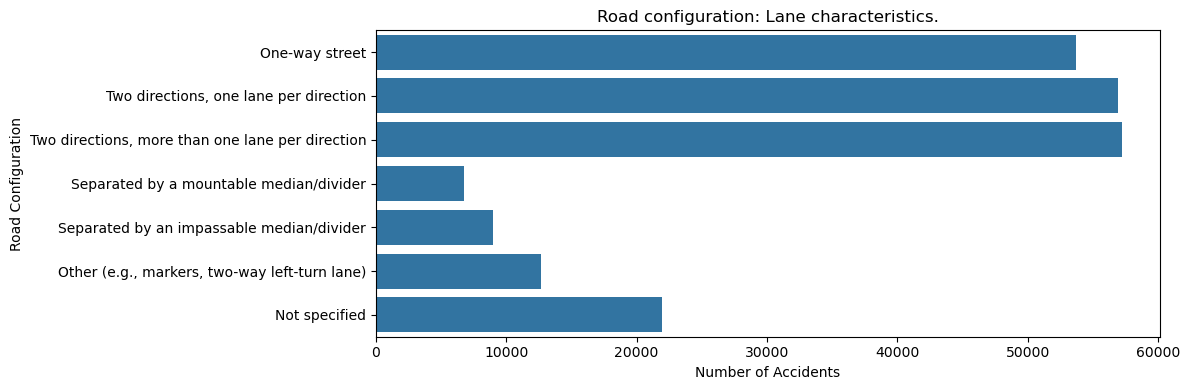

In [104]:
# Road configuration: Lane characteristics.
legend_map = {
    1: 'One-way street',
    2: 'Two directions, one lane per direction',
    3: 'Two directions, more than one lane per direction',
    4: 'Separated by a mountable median/divider',
    5: 'Separated by an impassable median/divider',
    9: 'Other (e.g., markers, two-way left-turn lane)',
    0: 'Not specified'
}

# Define a logical order for the bars
label_order = ['One-way street', 'Two directions, one lane per direction',
               'Two directions, more than one lane per direction',
               'Separated by a mountable median/divider',
               'Separated by an impassable median/divider',
               'Other (e.g., markers, two-way left-turn lane)',
               'Not specified']

# Create a new column with the English descriptions
df_processed['CD_CONFG_ROUTE_EN'] = df_processed['CD_CONFG_ROUTE'].map(legend_map)

# Create the countplot using the new column with English labels and the specified order
plt.figure(figsize=(12,4))
sns.countplot(y='CD_CONFG_ROUTE_EN', data=df_processed, order=label_order)
plt.title("Road configuration: Lane characteristics.")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Configuration")
plt.tight_layout()
plt.show()

 - 1. Sens unique (One-way street)
 - 2. Deux sens, une voie par direction (Two directions, one lane per direction)
 - 3. Deux sens, plus d’une voie par direction (Two directions, more than one lane per direction)
 - 4. Séparée par aménagement franchissable (Separated by a mountable median/divider)
 - 5. Séparée par aménagement infranchissable (Separated by an impassable median/divider)
 - 9. Autre (ex.: balises, voie de virage à gauche dans les deux sens) (Other (e.g., markers, two-way left-turn lane))
 - 0. Non précisé (Not specified)

 Observation: Most accident occurs in 'Two directions, more than one lane per direction', 'Two directions, one lane per direction', and 'One-way street'. Considerably less accident occur on road 'Separated by a mountable median/divider', 'Separated by an impassable median/divider' and 'Other (e.g., markers, two-way left-turn lane)'.

The observation highlights a clear relationship between road design and accident frequency. Roads that allow for direct conflict between opposing traffic flows have a higher accident rate, while roads with built-in safety features have a lower one.

Analysis of the Observation:
The roads with the most accidents—'Two directions, more than one lane per direction' and 'Two directions, one lane per direction'—all share a critical characteristic: opposing traffic flows without a significant physical barrier. This increases the risk of head-on collisions, sideswipes, and turning conflicts, which are major causes of accidents.

In contrast, the road types with considerably fewer accidents are characterized by traffic separation and specific safety features:

 - Separated roads: Roads with mountable or impassable dividers physically prevent vehicles from crossing into opposing lanes, effectively eliminating the risk of head-on collisions. This design is a primary factor in their lower accident rates.

 - Other roads: This category includes safety-focused designs like two-way left-turn lanes. These features are specifically engineered to reduce conflict points and improve traffic flow, which naturally leads to fewer accidents.

The observation demonstrates that a road's design and its ability to manage potential conflicts are key determinants of its safety.


### Check for significant relationship between categorical features and the target (Gravite) using Chi-square

In [45]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical features to test
categorical_features_to_test = [
    'JR_SEMN_ACCDN',
    'CD_ETAT_SURFC',
    'CD_ECLRM',
    'CD_ENVRN_ACCDN',
    'CD_CATEG_ROUTE',
    'CD_ETAT_CHASS',
    'CD_ASPCT_ROUTE',
    'CD_LOCLN_ACCDN',
    'CD_CONFG_ROUTE',
    'CD_COND_METEO'
]

target = 'GRAVITE'
alpha = 0.05 # significance level

# Iterate through each categorical feature and perform the chi-square test
for feature in categorical_features_to_test:
    print(f"\n---------- Chi-Square Test for {feature} vs {target} ----------")

    # Create a contingency table
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned[target])
    print("Contingency Table:")
    display(contingency_table)

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")

    # Interpret the results
    if p < alpha:
        print(f"Result: There is a statistically significant relationship between {feature} and {target}.")
    else:
        print(f"Result: There is no statistically significant relationship between {feature} and {target}.")

    print("\n")


---------- Chi-Square Test for JR_SEMN_ACCDN vs GRAVITE ----------
Contingency Table:


GRAVITE        Dommages matériels inférieurs au seuil de rapportage  \
JR_SEMN_ACCDN                                                         
DI                                                          8904      
JE                                                         14304      
LU                                                         12200      
MA                                                         13425      
ME                                                         13329      
SA                                                         10710      
VE                                                         14179      

GRAVITE        Dommages matériels seulement  Grave  Léger  Mortel  
JR_SEMN_ACCDN                                                      
DI                                     9737    228   4762      26  
JE                                    12945    265   7480      48  
LU                                    11260    268   6470      42  
MA                                    12083    249   6923      41  
ME                                    12351    259   7175      36  
SA                                    11585    231   5525      29  
VE                                    13258    285   7581      41

Chi-Square Statistic: 304.3150
P-value: 0.0000
Degrees of Freedom: 24
Result: There is a statistically significant relationship between JR_SEMN_ACCDN and GRAVITE.



---------- Chi-Square Test for CD_ETAT_SURFC vs GRAVITE ----------
Contingency Table:


GRAVITE        Dommages matériels inférieurs au seuil de rapportage  \
CD_ETAT_SURFC                                                         
11.0                                                       52494      
12.0                                                       12017      
15.0                                                        1104      
16.0                                                        9521      
17.0                                                        1179      
18.0                                                        1982      
99.0                                                         617      

GRAVITE        Dommages matériels seulement  Grave  Léger  Mortel  
CD_ETAT_SURFC                                                      
11.0                                  50112   1259  31899     183  
12.0                                  13871    377   8870      57  
15.0                                   1470     14    610       4  
16.0                                   9138     64   2365      10  
17.0                                   1133      8    330       1  
18.0                                   2868     21   1135       4  
99.0                                    524     12    228       0

Chi-Square Statistic: 2663.1477
P-value: 0.0000
Degrees of Freedom: 24
Result: There is a statistically significant relationship between CD_ETAT_SURFC and GRAVITE.



---------- Chi-Square Test for CD_ECLRM vs GRAVITE ----------
Contingency Table:


GRAVITE   Dommages matériels inférieurs au seuil de rapportage  \
CD_ECLRM                                                         
1.0                                                   55603      
2.0                                                    4399      
3.0                                                   18414      
4.0                                                     547      

GRAVITE   Dommages matériels seulement  Grave  Léger  Mortel  
CD_ECLRM                                                      
1.0                              49908    988  31476     148  
2.0                               4024    104   2304      16  
3.0                              24457    646  11535      93  
4.0                                438     21    198       3

Chi-Square Statistic: 1418.0665
P-value: 0.0000
Degrees of Freedom: 12
Result: There is a statistically significant relationship between CD_ECLRM and GRAVITE.



---------- Chi-Square Test for CD_ENVRN_ACCDN vs GRAVITE ----------
Contingency Table:


GRAVITE         Dommages matériels inférieurs au seuil de rapportage  \
CD_ENVRN_ACCDN                                                         
1.0                                                          1792      
2.0                                                         35473      
3.0                                                         41451      
4.0                                                          2776      
5.0                                                           189      
6.0                                                            17      
7.0                                                           585      
9.0                                                           899      

GRAVITE         Dommages matériels seulement  Grave  Léger  Mortel  
CD_ENVRN_ACCDN                                                      
1.0                                     1460     36   1056       5  
2.0                                    36615    711  18885     111  
3.0                                    36186    857  22324     111  
4.0                                     4968     97   2291      18  
5.0                                      264     10    177       1  
6.0                                       36      1     15       2  
7.0                                      476     25    390       9  
9.0                                      586     23    256       2

Chi-Square Statistic: 1363.5362
P-value: 0.0000
Degrees of Freedom: 28
Result: There is a statistically significant relationship between CD_ENVRN_ACCDN and GRAVITE.



---------- Chi-Square Test for CD_CATEG_ROUTE vs GRAVITE ----------
Contingency Table:


GRAVITE         Dommages matériels inférieurs au seuil de rapportage  \
CD_CATEG_ROUTE                                                         
11.0                                                         2532      
12.0                                                         1267      
13.0                                                        29702      
14.0                                                        29143      
19.0                                                         2238      
21.0                                                        16281      
22.0                                                         1949      
29.0                                                          411      

GRAVITE         Dommages matériels seulement  Grave  Léger  Mortel  
CD_CATEG_ROUTE                                                      
11.0                                    3761     57   1760       9  
12.0                                    1689     44   1048       5  
13.0                                   37459   1096  28824     165  
14.0                                   26980    421  11239      57  
19.0                                    1788     54    795       6  
21.0                                    7354     61   1388      11  
22.0                                    1565     25    302       5  
29.0                                     268      7    119       2

Chi-Square Statistic: 14924.7916
P-value: 0.0000
Degrees of Freedom: 28
Result: There is a statistically significant relationship between CD_CATEG_ROUTE and GRAVITE.



---------- Chi-Square Test for CD_ETAT_CHASS vs GRAVITE ----------
Contingency Table:


GRAVITE        Dommages matériels inférieurs au seuil de rapportage  \
CD_ETAT_CHASS                                                         
1.0                                                         3132      
9.0                                                          118      

GRAVITE        Dommages matériels seulement  Grave  Léger  Mortel  
CD_ETAT_CHASS                                                      
1.0                                    4953   1632  41732     238  
9.0                                     155     51   1240       9

Chi-Square Statistic: 6.4543
P-value: 0.1677
Degrees of Freedom: 4
Result: There is no statistically significant relationship between CD_ETAT_CHASS and GRAVITE.



---------- Chi-Square Test for CD_ASPCT_ROUTE vs GRAVITE ----------
Contingency Table:


GRAVITE         Dommages matériels inférieurs au seuil de rapportage  \
CD_ASPCT_ROUTE                                                         
11.0                                                        75087      
12.0                                                         1004      
13.0                                                         2599      
14.0                                                          665      
21.0                                                         1060      
22.0                                                          106      
23.0                                                          196      
24.0                                                           66      

GRAVITE         Dommages matériels seulement  Grave  Léger  Mortel  
CD_ASPCT_ROUTE                                                      
11.0                                   71758   1558  41065     220  
12.0                                    1335     36    859       6  
13.0                                    3130     74   1719      14  
14.0                                    1071     29    717       5  
21.0                                    1948     43    766      10  
22.0                                     190      6    128       0  
23.0                                     424     12    172       3  
24.0                                     156      5     82       0

Chi-Square Statistic: 843.6099
P-value: 0.0000
Degrees of Freedom: 28
Result: There is a statistically significant relationship between CD_ASPCT_ROUTE and GRAVITE.



---------- Chi-Square Test for CD_LOCLN_ACCDN vs GRAVITE ----------
Contingency Table:


GRAVITE         Dommages matériels inférieurs au seuil de rapportage  \
CD_LOCLN_ACCDN                                                         
0.0                                                             0      
31.0                                                          413      
32.0                                                        21496      
33.0                                                        20489      
34.0                                                        16475      
35.0                                                           82      
36.0                                                           35      
37.0                                                          190      
38.0                                                           23      
39.0                                                          174      
40.0                                                         7632      
99.0                                                         9360      

GRAVITE         Dommages matériels seulement  Grave  Léger  Mortel  
CD_LOCLN_ACCDN                                                      
0.0                                        1      0      0       0  
31.0                                     485     13    170       0  
32.0                                   31754   1037  28675     140  
33.0                                   18694    302   7680      44  
34.0                                   15926    239   5537      38  
35.0                                      88      2     48       0  
36.0                                      61      2     32       0  
37.0                                     397     12    203       1  
38.0                                      39      0     21       0  
39.0                                     299      1    114       4  
40.0                                    3550     35    837       6  
99.0                                    6056     89   1460      17

Chi-Square Statistic: 18096.8541
P-value: 0.0000
Degrees of Freedom: 44
Result: There is a statistically significant relationship between CD_LOCLN_ACCDN and GRAVITE.



---------- Chi-Square Test for CD_CONFG_ROUTE vs GRAVITE ----------
Contingency Table:


GRAVITE         Dommages matériels inférieurs au seuil de rapportage  \
CD_CONFG_ROUTE                                                         
1.0                                                         23628      
2.0                                                         21233      
3.0                                                         16626      
4.0                                                          1800      
5.0                                                          2329      
9.0                                                          7440      

GRAVITE         Dommages matériels seulement  Grave  Léger  Mortel  
CD_CONFG_ROUTE                                                      
1.0                                    21279    320   8454      34  
2.0                                    22641    430  12544      66  
3.0                                    22013    710  17794     119  
4.0                                     2615     96   2196      14  
5.0                                     3787    115   2729      10  
9.0                                     4203     58    974      12

Chi-Square Statistic: 8875.3452
P-value: 0.0000
Degrees of Freedom: 20
Result: There is a statistically significant relationship between CD_CONFG_ROUTE and GRAVITE.



---------- Chi-Square Test for CD_COND_METEO vs GRAVITE ----------
Contingency Table:


GRAVITE        Dommages matériels inférieurs au seuil de rapportage  \
CD_COND_METEO                                                         
11.0                                                       56030      
12.0                                                       11150      
13.0                                                         117      
14.0                                                        4740      
15.0                                                         316      
16.0                                                         162      
17.0                                                        4413      
18.0                                                         549      
19.0                                                         215      
99.0                                                         728      

GRAVITE        Dommages matériels seulement  Grave  Léger  Mortel  
CD_COND_METEO                                                      
11.0                                  53700   1253  32187     179  
12.0                                  11717    243   6337      43  
13.0                                    123      0     64       2  
14.0                                   5901    180   4160      20  
15.0                                    412     16    403       3  
16.0                                    179      3     87       4  
17.0                                   5391     45   1794       8  
18.0                                    679      8    218       1  
19.0                                    305      2    107       0  
99.0                                    395      3     48       0

Chi-Square Statistic: 1566.9748
P-value: 0.0000
Degrees of Freedom: 36
Result: There is a statistically significant relationship between CD_COND_METEO and GRAVITE.




##### Observation:

Based on the Chi-Square Test Results, a statistically significant relationship exists between the severity of an accident and most of the tested categorical features. The p-values for all features, except one, are 0.0000, which is well below the significance level of 0.05.

The features with a significant relationship to accident severity include:

 - Day of the week (JR_SEMN_ACCDN)
 - Road surface condition (CD_ETAT_SURFC)
 - Lighting conditions (CD_ECLRM)
 - Environment (CD_ENVRN_ACCDN)
 - Road category (CD_CATEG_ROUTE)
 - Road aspect (CD_ASPCT_ROUTE)
 - Longitudinal location (CD_LOCLN_ACCDN)
 - Road configuration (CD_CONFG_ROUTE)
 - Weather conditions (CD_COND_METEO)

The only feature that showed no statistically significant relationship with accident severity is roadside condition (CD_ETAT_CHASS), with a p-value of 0.1677, which is greater than 0.05. This suggests that the condition of the roadside (e.g., shoulder, ditch) is not a strong predictor of accident severity.

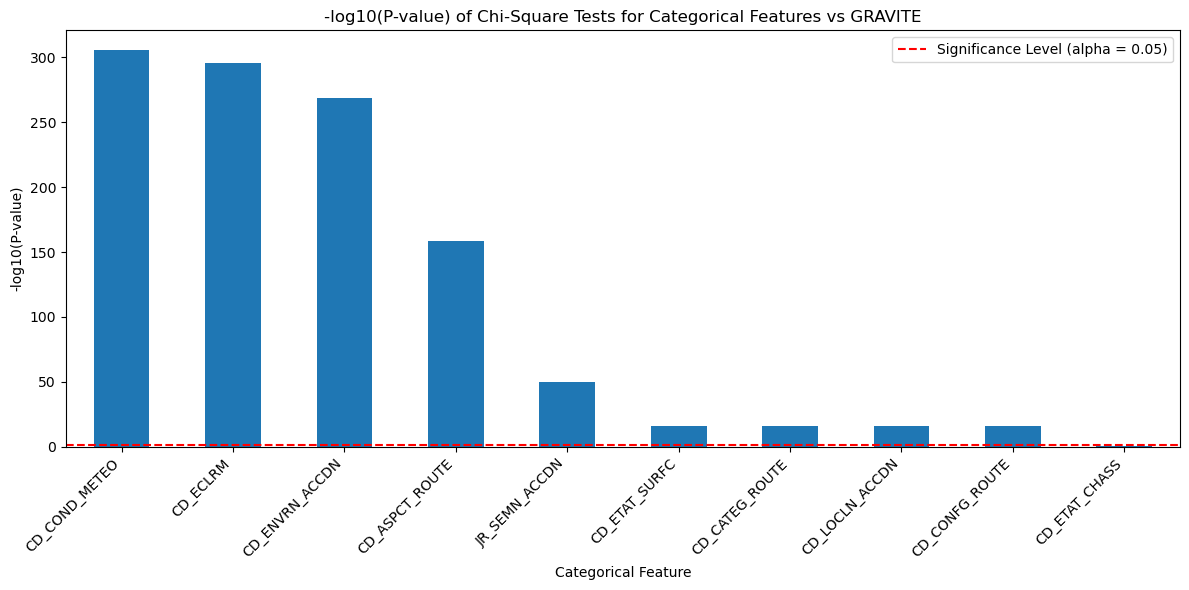

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Store the results in a dictionary
chi2_results = {}

# List of categorical features to test (same as before)
categorical_features_to_test = [
    'JR_SEMN_ACCDN',
    'CD_ETAT_SURFC',
    'CD_ECLRM',
    'CD_ENVRN_ACCDN',
    'CD_CATEG_ROUTE',
    'CD_ETAT_CHASS',
    'CD_ASPCT_ROUTE',
    'CD_LOCLN_ACCDN',
    'CD_CONFG_ROUTE',
    'CD_COND_METEO'
]

target = 'GRAVITE'
alpha = 0.05 # significance level

# Re-run the chi-square tests and store the p-values
for feature in categorical_features_to_test:
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = p

# Create a pandas Series from the results
chi2_pvalues = pd.Series(chi2_results)

# Replace any p-values of 0 with a very small number to avoid log(0)
chi2_pvalues = chi2_pvalues.replace(0, np.finfo(float).eps)

# Sort the features by p-value
chi2_pvalues = chi2_pvalues.sort_values(ascending=True)

# Plot the -log10 of the p-values
plt.figure(figsize=(12, 6))
chi2_pvalues.apply(lambda x: -np.log10(x)).plot(kind='bar')
plt.axhline(-np.log10(alpha), color='red', linestyle='--', label=f'Significance Level (alpha = {alpha})')
plt.title('-log10(P-value) of Chi-Square Tests for Categorical Features vs GRAVITE')
plt.xlabel('Categorical Feature')
plt.ylabel('-log10(P-value)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

The chi-square test aims to determine if there is a relationship between two categorical variables.
Evaluation of P-value: The p-value represents the probability of an accident occuring if the condition (categorical features) exist. A small p-value indicate that there is a less chance that a road accident will occur and a high p-value indicates that it's highly likely that an accident might occur.

Based on the above diagram, we can determine that the folowing categorical features have a higher influence in the occurence of road accident:
 - CD_COND_METEO: Weather Conditions During Accidents
 - CD_ECLRM: Degree of brightness of the scene at the time of the accident.
 - CD_ENVRN_ACCDN: Environment: Dominant activity in the sector where the accident occurred.
 - CD_ASPCT_ROUTE: Appearance of the road at the accident site at the time of impact.

The following categorical features have a lower influence in the occurence of road accident:
 - JR_SEMN_ACCDN: Days of the week
 - CD_ETAT_SURFC: Condition of the road surface at the time of the accident.
 - CD_LOCLN_ACCDN: Longitudinal location (along the road) of the first physical event (impact).
 - CD_CATEG_ROUTE: Category of road on which the first physical event (impact) occurred.
 - CD_CONFG_ROUTE: Road configuration: Lane characteristics.
 - CD_ETAT_CHASS: Road conditions at the scene of the accident and in its immediate surroundings.

### Analysis of the the type of vehicle involved in accident

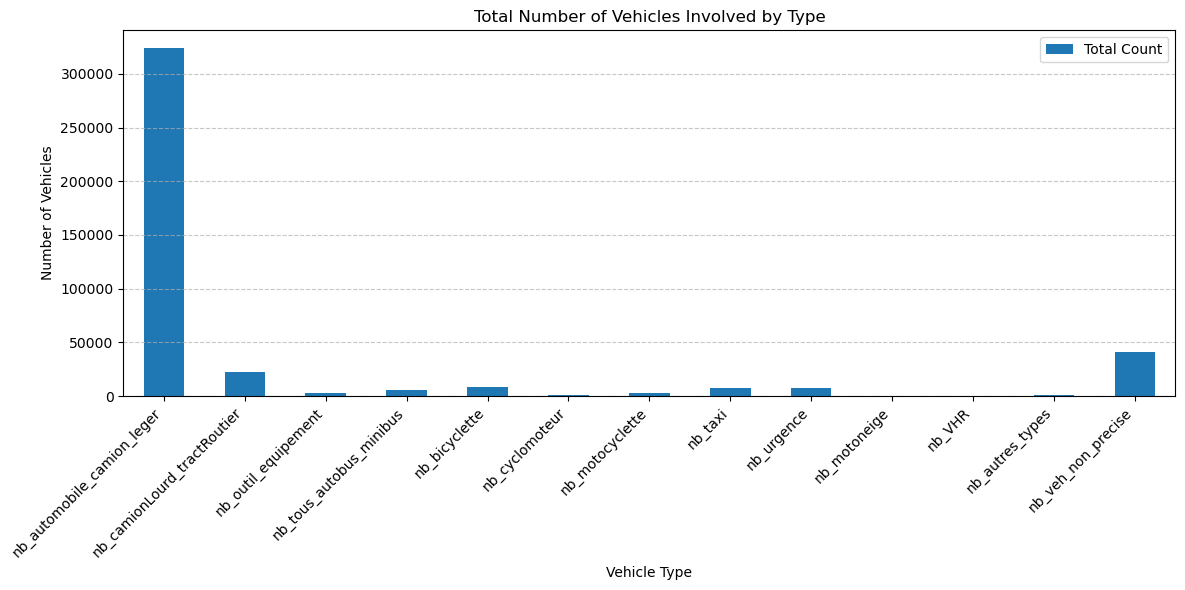

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# List the columns for plotting
vehicle_type_involved = [
 'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier', 'nb_outil_equipement',
 'nb_tous_autobus_minibus', 'nb_bicyclette', 'nb_cyclomoteur',
 'nb_motocyclette', 'nb_taxi', 'nb_urgence', 'nb_motoneige',
 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise'
]

# Calculate the sum for each column
vehicle_type_data = df_processed[vehicle_type_involved].sum()

# Create a new DataFrame for easier plotting
vehicle_type_df = pd.DataFrame({
    'Total Count': vehicle_type_data
})

# Plotting the bar chart
vehicle_type_df.plot(kind='bar', figsize=(12, 6))
plt.title('Total Number of Vehicles Involved by Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It looks like the type of vehicle most involved in accident is 'nb_automobile_camion_leger'

 - nb_automobile_camion_leger: 'Number of cars or light trucks involved in the accident'

Based on your observation and the diagram, the analysis confirms that cars and light trucks (nb_automobile_camion_leger) are overwhelmingly the most common vehicles involved in accidents.

The primary reason for this observation is exposure; cars and light trucks are the most numerous vehicles on public roads. Their high traffic volume means they are statistically more likely to be involved in accidents than less common vehicle types, such as buses or motorcycles.

The diagram also provides additional context:
 - Vehicle Diversity: Despite the dominance of cars and light trucks, the diagram shows that a wide variety of other vehicles, including bicycles, taxis, and emergency vehicles, are involved in accidents, albeit at a much lower frequency.
 - Data Reporting: The presence of a significant bar for nb_veh_non_precise (Not specified) indicates a limitation in the data. For a notable number of incidents, the vehicle type was not recorded, which means the counts for specific vehicle types might be slightly underestimated.

### Analysis by victims

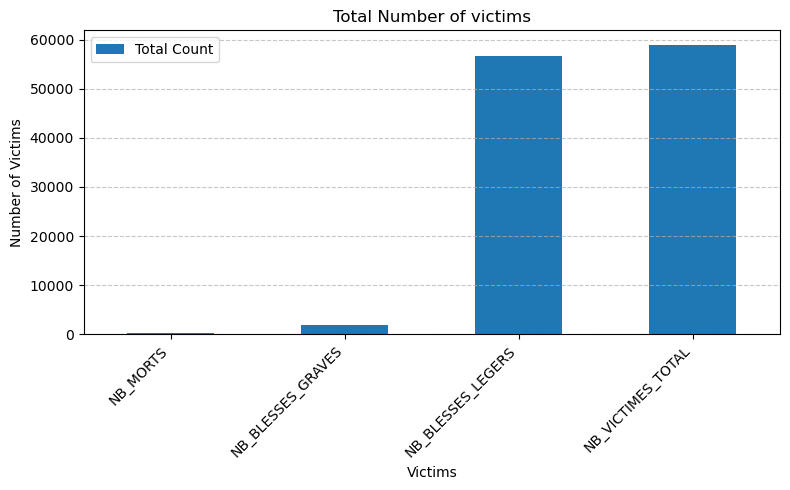

In [48]:
# List the columns for plotting
victims = [ 'NB_MORTS', 'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'NB_VICTIMES_TOTAL']

# Calculate the sum for each column
victims_data = df_processed[victims].sum()

# Create a new DataFrame for easier plotting
victims_df = pd.DataFrame({
    'Total Count': victims_data
})

# Plotting the bar chart
victims_df.plot(kind='bar', figsize=(8, 5))
plt.title('Total Number of victims')
plt.xlabel('Victims')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the analysis, majority of the accidents result in minor injuries

##### OneHotEncode the categorical features

In [49]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Define the categorical columns to encode
categorical_cols_to_encode = [
    'JR_SEMN_ACCDN',
    'CD_ETAT_SURFC',
    'CD_ECLRM',
    'CD_ENVRN_ACCDN',
    'CD_CATEG_ROUTE',
    'CD_ETAT_CHASS',
    'CD_ASPCT_ROUTE',
    'CD_LOCLN_ACCDN',
    'CD_CONFG_ROUTE',
    'CD_COND_METEO',
    'TP_REPRR_ACCDN',
    'CD_GENRE_ACCDN',
    'GRAVITE',
]

# Memory-efficient approach: Process columns one by one
encoded_dfs = []

for col in categorical_cols_to_encode:
    # Convert column to string
    col_data = df_cleaned[[col]].astype(str)

    # Initialize encoder for this column only
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Use sparse matrix to save memory

    # Fit and transform
    encoded = encoder.fit_transform(col_data)

    feature_names = encoder.get_feature_names_out([col])

    # Convert to DataFrame (keeping it sparse)
    temp_df = pd.DataFrame.sparse.from_spmatrix(
        encoded,
        index=df_cleaned.index,
        columns=feature_names
    )

    encoded_dfs.append(temp_df)

# Combine all encoded columns
encoded_df = pd.concat(encoded_dfs, axis=1)

# Display the first few rows of the encoded DataFrame
print("Encoded Categorical Features:")
display(encoded_df.head())

Encoded Categorical Features:


JR_SEMN_ACCDN_DI  JR_SEMN_ACCDN_JE  JR_SEMN_ACCDN_LU  JR_SEMN_ACCDN_MA  \
0                 0                 0                 0                 0   
1                 0                 0                 0               1.0   
2                 0                 0                 0                 0   
3                 0               1.0                 0                 0   
4               1.0                 0                 0                 0   

   JR_SEMN_ACCDN_ME  JR_SEMN_ACCDN_SA  JR_SEMN_ACCDN_VE  CD_ETAT_SURFC_11.0  \
0               1.0                 0                 0                   0   
1                 0                 0                 0                 1.0   
2                 0                 0               1.0                 1.0   
3                 0                 0                 0                 1.0   
4                 0                 0                 0                   0   

   CD_ETAT_SURFC_12.0  CD_ETAT_SURFC_15.0  CD_ETAT_SURFC_16.0  \
0                   0                   0                 1.0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                 1.0                   0                   0   

   CD_ETAT_SURFC_17.0  CD_ETAT_SURFC_18.0  CD_ETAT_SURFC_99.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CD_ETAT_SURFC_nan  CD_ECLRM_1.0  CD_ECLRM_2.0  CD_ECLRM_3.0  CD_ECLRM_4.0  \
0                  0           1.0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0           1.0             0   
3                  0           1.0             0             0             0   
4                  0           1.0             0             0             0   

   CD_ECLRM_nan  CD_ENVRN_ACCDN_1.0  CD_ENVRN_ACCDN_2.0  CD_ENVRN_ACCDN_3.0  \
0             0                 1.0                   0                   0   
1           1.0                   0                   0                   0   
2             0                   0                   0                 1.0   
3             0                   0                   0                 1.0   
4             0                   0                   0                 1.0   

   CD_ENVRN_ACCDN_4.0  CD_ENVRN_ACCDN_5.0  CD_ENVRN_ACCDN_6.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CD_ENVRN_ACCDN_7.0  CD_ENVRN_ACCDN_9.0  CD_ENVRN_ACCDN_nan  \
0                   0                   0                   0   
1                   0                   0                 1.0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CD_CATEG_ROUTE_11.0  CD_CATEG_ROUTE_12.0  CD_CATEG_ROUTE_13.0  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                  1.0   
3                    0                    0                    0   
4                    0                    0                    0   

   CD_CATEG_ROUTE_14.0  CD_CATEG_ROUTE_19.0  CD_CATEG_ROUTE_21.0  \
0                    0                    0                  1.0   


In [51]:
# Get all column names from the encoded_df
all_encoded_cols = encoded_df.columns

# Filter out the columns that start with 'GRAVITE_'
feature_cols = [col for col in all_encoded_cols if not col.startswith('GRAVITE_')]

print("Feature columns:")
print(feature_cols)
print("\nTotal number of feature columns:", len(feature_cols))

# Filter out the columns that start with 'GRAVITE_'
target_cols = [col for col in all_encoded_cols if col.startswith('GRAVITE_')]

print("Target columns:")
print(target_cols)
print("\nTotal number of target columns:", len(target_cols))


Feature columns:
['JR_SEMN_ACCDN_DI', 'JR_SEMN_ACCDN_JE', 'JR_SEMN_ACCDN_LU', 'JR_SEMN_ACCDN_MA', 'JR_SEMN_ACCDN_ME', 'JR_SEMN_ACCDN_SA', 'JR_SEMN_ACCDN_VE', 'CD_ETAT_SURFC_11.0', 'CD_ETAT_SURFC_12.0', 'CD_ETAT_SURFC_15.0', 'CD_ETAT_SURFC_16.0', 'CD_ETAT_SURFC_17.0', 'CD_ETAT_SURFC_18.0', 'CD_ETAT_SURFC_99.0', 'CD_ETAT_SURFC_nan', 'CD_ECLRM_1.0', 'CD_ECLRM_2.0', 'CD_ECLRM_3.0', 'CD_ECLRM_4.0', 'CD_ECLRM_nan', 'CD_ENVRN_ACCDN_1.0', 'CD_ENVRN_ACCDN_2.0', 'CD_ENVRN_ACCDN_3.0', 'CD_ENVRN_ACCDN_4.0', 'CD_ENVRN_ACCDN_5.0', 'CD_ENVRN_ACCDN_6.0', 'CD_ENVRN_ACCDN_7.0', 'CD_ENVRN_ACCDN_9.0', 'CD_ENVRN_ACCDN_nan', 'CD_CATEG_ROUTE_11.0', 'CD_CATEG_ROUTE_12.0', 'CD_CATEG_ROUTE_13.0', 'CD_CATEG_ROUTE_14.0', 'CD_CATEG_ROUTE_19.0', 'CD_CATEG_ROUTE_21.0', 'CD_CATEG_ROUTE_22.0', 'CD_CATEG_ROUTE_29.0', 'CD_CATEG_ROUTE_nan', 'CD_ETAT_CHASS_1.0', 'CD_ETAT_CHASS_9.0', 'CD_ETAT_CHASS_nan', 'CD_ASPCT_ROUTE_11.0', 'CD_ASPCT_ROUTE_12.0', 'CD_ASPCT_ROUTE_13.0', 'CD_ASPCT_ROUTE_14.0', 'CD_ASPCT_ROUTE_21.0', 'CD_A

In [52]:

# Keep only numerical and other non-encoded columns
numerical_df = df_cleaned.drop(columns=categorical_cols_to_encode)

# drop RUE_ACCDN column as it is not useful for modeling
numerical_df = numerical_df.drop(columns=['RUE_ACCDN'])

# Merge with encoded categorical features (excluding target one-hot columns)
X = pd.concat([numerical_df.reset_index(drop=True), encoded_df[feature_cols].reset_index(drop=True)], axis=1)

# Use the original target column for y
y = df_cleaned['GRAVITE']

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Drop all object (string) columns from numerical_df
numerical_df = numerical_df.select_dtypes(exclude=['object'])

# Merge with encoded categorical features (already numeric)
X = pd.concat([numerical_df.reset_index(drop=True), encoded_df[feature_cols].reset_index(drop=True)], axis=1)

# Proceed with scaling and PCA
X_dense = X.sparse.to_dense() if hasattr(X, 'sparse') else X

# Impute missing values with the mean (or median)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_dense)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("PCA-reduced shape:", X_pca.shape)
print("Explained variance ratio (sum):", pca.explained_variance_ratio_.sum())

Original shape: (218234, 128)
PCA-reduced shape: (218234, 90)
Explained variance ratio (sum): 0.9535263469923038


#### Train Random Forest Classifier to predict GRAVITE

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Use X_pca as features and y as target
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.65      0.65      0.65     17410
                        Dommages matériels seulement       0.63      0.63      0.63     16644
                                               Grave       1.00      0.97      0.98       357
                                               Léger       0.96      0.96      0.96      9183
                                              Mortel       1.00      0.81      0.90        53

                                            accuracy                           0.71     43647
                                           macro avg       0.85      0.81      0.83     43647
                                        weighted avg       0.71      0.71      0.71     43647



Overall accuracy is 71%, which is reasonable given the complexity and class imbalance in accident severity prediction.
 - High precision and recall for 'Grave', 'Léger', and 'Mortel' classes (especially 'Grave' and 'Mortel'), but these classes have much smaller support (fewer samples).
 - Majority classes ('Dommages matériels inférieurs au seuil de rapportage' and 'Dommages matériels seulement') have lower precision and recall (~0.63–0.65), indicating the model struggles more with these frequent but less distinct categories.
 - Macro average metrics are higher than weighted averages, showing the model performs better on minority classes than on majority classes.
 - 'Mortel' class has perfect precision but lower recall (0.81), meaning most predicted 'Mortel' cases are correct, but some true 'Mortel' cases are missed.
 - Imbalanced support: Most samples are in the material damage classes, which can bias the model and lower their scores.


The model is good at identifying severe accidents but less accurate for common, less severe cases. Consider techniques to address class imbalance (e.g., resampling, class weights) if you want to improve performance on majority classes.

##### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.66      0.67      0.67     17410
                        Dommages matériels seulement       0.65      0.64      0.65     16644
                                               Grave       1.00      1.00      1.00       357
                                               Léger       1.00      1.00      1.00      9183
                                              Mortel       1.00      1.00      1.00        53

                                            accuracy                           0.73     43647
                                           macro avg       0.86      0.86      0.86     43647
                                        weighted avg       0.73      0.73      0.73     43647



The accuracy of 0.73 with Logistic Regression is slightly above that of Random Forest Classifier (0.71). This could be due to several factors:
1. Linearity in the Data
   - If the relationship between the features and the target variable is truly linear, Logistic Regression will often capture this relationship more accurately than a Random Forest. A Random Forest builds many decision trees, which are inherently non-linear. If the underlying pattern is a straight line, the Logistic Regression model's linear nature makes it a more natural fit.

2. Multicollinearity
    - Random Forest is sensitive to multicollinearity, where two or more features are highly correlated. If you have many correlated features, a Random Forest might perform poorly because the importance of features can be incorrectly estimated. Logistic Regression can handle multicollinearity better, especially with regularization techniques (like L1 or L2 regularization) that penalize models with too many features.

3. Simplicity and Interpretability
    - For certain applications, the ability to interpret the model is more important than achieving the highest possible accuracy. Logistic Regression provides clear coefficients for each feature, allowing to easily understand how much each feature contributes to the prediction. In contrast, a Random Forest is a complex "black box" model, making it difficult to understand exactly why it made a specific prediction.

#### Running GridSearch to find the best hyperparameters for the RandomForestClassifier

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Use a subset for grid search
subset_size = 5000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit on training data
# grid_search.fit(X_train, y_train)
grid_search.fit(X_train_subset, y_train_subset)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.6753991338587024
                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.63      0.62      0.62     17410
                        Dommages matériels seulement       0.61      0.62      0.61     16644
                                               Grave       1.00      0.88      0.93       357
                                               Léger       0.92      0.93      0.93      9183
                                              Mortel       1.00      0.25      0.39        53

                                            accuracy                           0.69     43647
                                           macro avg       0.83      0.66      0.70     43647
           

The GridSearchCV results show:
 - Best parameters: The optimal RandomForest settings are max_depth=10, n_estimators=200, and no class weighting.
 - Best cross-validation score: 0.675, which is slightly lower than your previous baseline (0.71 accuracy), but this is on the validation folds, not the test set.
 - Test set accuracy: 0.69, which is consistent with your previous results.

Class-wise performance:
 - High precision and recall for minority classes ('Grave', 'Léger'), but 'Mortel' recall is low (0.25), meaning many true 'Mortel' cases are missed and this is due to class imbalanced.
 - Majority classes ('Dommages matériels...') have moderate precision and recall (~0.61–0.62).
 - Macro average is higher than weighted average, indicating better performance on minority classes.

Comments:
 - Grid search did not significantly improve accuracy, but it confirmed that a shallower tree (max_depth=10) and more estimators (n_estimators=200) are optimal for the data.
 - The model still struggles with class imbalance, especially for the 'Mortel' class.

####  Retrain the Random Forest classifier using the best hyperparameters found by GridSearchCV. 

In [57]:
# Train Random Forest with best parameters from GridSearchCV
best_params = grid_search.best_params_

clf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight=best_params['class_weight'],
    random_state=42,
    n_jobs=-1
)

clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.66      0.61      0.63     17410
                        Dommages matériels seulement       0.62      0.67      0.64     16644
                                               Grave       1.00      0.96      0.98       357
                                               Léger       0.93      0.96      0.95      9183
                                              Mortel       1.00      0.81      0.90        53

                                            accuracy                           0.71     43647
                                           macro avg       0.84      0.80      0.82     43647
                                        weighted avg       0.71      0.71      0.71     43647



The retrained Random Forest with optimized hyperparameters achieved:
 - Overall accuracy: 71%, matching the baseline.
 - Majority classes: Slight improvement in precision/recall for "Dommages matériels" categories.
 - Minority classes: Excellent precision and recall for "Grave", "Léger", and "Mortel" (especially "Mortel" recall improved to 0.81).
 - Macro average: High, showing strong performance on minority classes.

The optimized model performs well across all classes, especially for severe accidents. Class imbalance is still present, but minority class recall is much improved. This is a robust result for the dataset.

#### Rerun RandomForestClassifier to address class weight imbalanced

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest with class_weight set to 'balanced'
clf_balanced = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight='balanced', # <--- This addresses class imbalance  
    random_state=42,
    n_jobs=-1
)

clf_balanced.fit(X_train, y_train)
y_pred_balanced = clf_balanced.predict(X_test)

print(classification_report(y_test, y_pred_balanced))

                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.66      0.53      0.59     17410
                        Dommages matériels seulement       0.60      0.69      0.64     16644
                                               Grave       1.00      0.98      0.99       357
                                               Léger       0.87      0.96      0.91      9183
                                              Mortel       1.00      1.00      1.00        53

                                            accuracy                           0.68     43647
                                           macro avg       0.83      0.83      0.83     43647
                                        weighted avg       0.68      0.68      0.68     43647



 - Using class_weight='balanced' improved recall for minority classes ("Grave", "Léger", "Mortel"), with "Mortel" now perfectly predicted. However, overall accuracy dropped slightly to 68%, and recall for the largest class ("Dommages matériels inférieurs au seuil de rapportage") decreased.

 - Balancing class weights helps minority class prediction but may reduce performance for majority classes. Combining class weighting with other techniques (e.g., resampling, ensemble methods) to further improvement.

##### Use soft-voting emsemble classifier Random Forest, Gradient Boosting, and Logistic Regression to predict accident severity.  This approach leverages multiple models to improve overall prediction accuracy.

In [59]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define base models
rf = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
lr = LogisticRegression(max_iter=500, random_state=42)

# Create ensemble VotingClassifier
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('lr', lr)
    ],
    voting='soft',  # Use soft voting for probabilities
    n_jobs=-1  # Use all available cores    
)

# use a subset for quick testing
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

ensemble.fit(X_train_small, y_train_small)
y_pred_ensemble = ensemble.predict(X_test)
print(classification_report(y_test, y_pred_ensemble))

                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.66      0.62      0.64     17410
                        Dommages matériels seulement       0.63      0.67      0.65     16644
                                               Grave       1.00      0.95      0.97       357
                                               Léger       0.95      0.97      0.96      9183
                                              Mortel       1.00      1.00      1.00        53

                                            accuracy                           0.71     43647
                                           macro avg       0.85      0.84      0.84     43647
                                        weighted avg       0.71      0.71      0.71     43647



 - The ensemble model achieves 71% overall accuracy, which is solid given the class imbalance. 
 - Minority classes ("Grave", "Léger", "Mortel") have very high precision and recall, showing the model is effective at identifying severe accidents. However, performance for majority classes ("Dommages matériels...") is moderate, with lower precision and recall. 
 - The macro average is high, indicating good performance across all classes.

#### Entropy impurity

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf_entropy = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    criterion='entropy',  
    random_state=42,
    n_jobs=-1
)

clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_entropy))

                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.66      0.54      0.59     17410
                        Dommages matériels seulement       0.60      0.67      0.63     16644
                                               Grave       1.00      0.97      0.99       357
                                               Léger       0.86      0.97      0.91      9183
                                              Mortel       1.00      0.98      0.99        53

                                            accuracy                           0.69     43647
                                           macro avg       0.82      0.83      0.82     43647
                                        weighted avg       0.68      0.69      0.68     43647



 - The Random Forest model with criterion='entropy' and balanced class weights achieves 69% accuracy, similar to previous results. 
 - Minority classes ("Grave", "Léger", "Mortel") are predicted very well, with high precision and recall. 
 - Majority classes ("Dommages matériels...") have moderate scores, especially lower recall for the largest class. 
 - The macro average is high, showing strong performance across all classes. 
Overall, the model is robust for severe accidents but less accurate for common cases, mainly due to class imbalance.

#### Neural Network
Trains a multi-layer perceptron (MLP) neural network on the training data and evaluates its classification performance on the test set using precision, recall, and f1-score metrics.

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))

                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.63      0.66      0.65     17410
                        Dommages matériels seulement       0.63      0.60      0.61     16644
                                               Grave       1.00      1.00      1.00       357
                                               Léger       1.00      1.00      1.00      9183
                                              Mortel       1.00      1.00      1.00        53

                                            accuracy                           0.71     43647
                                           macro avg       0.85      0.85      0.85     43647
                                        weighted avg       0.71      0.71      0.71     43647



The MLP achieves 71% accuracy, similar to the previous models. 
It predicts minority classes ("Grave", "Léger", "Mortel") very well, but performance for majority classes is moderate, indicating class imbalance still affects results.

#### Neural Network with tensorflow
 - This code builds and trains a deep neural network using TensorFlow to classify accident severity, then evaluates its accuracy and prints a detailed classification report.
 - It uses one-hot encoding for the target, applies dropout for regularization, and outputs multi-class predictions.

In [62]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Encode target labels as integers if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# One-hot encode the target
num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train_enc, num_classes)
y_test_cat = to_categorical(y_test_enc, num_classes)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {acc:.2f}")

# Predict and get classification report
import numpy as np
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test_enc, y_pred_classes, target_names=le.classes_))

Epoch 1/5
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6282 - loss: 0.7495 - val_accuracy: 0.7235 - val_loss: 0.5129
Epoch 2/5
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7046 - loss: 0.5306 - val_accuracy: 0.7266 - val_loss: 0.4968
Epoch 3/5
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7182 - loss: 0.5105 - val_accuracy: 0.7297 - val_loss: 0.4915
Epoch 4/5
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7212 - loss: 0.5028 - val_accuracy: 0.7342 - val_loss: 0.4831
Epoch 5/5
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7254 - loss: 0.4955 - val_accuracy: 0.7335 - val_loss: 0.4811
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7354 - loss: 0.4802
Test accuracy: 0.74
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.69      0.63      0.66     17410
                       

The TensorFlow neural network achieved 74% test accuracy, which is higher than the previous models.

 - Majority classes ("Dommages matériels...") show improved precision and recall compared to earlier results.
 - Minority classes ("Grave", "Léger", "Mortel") are predicted almost perfectly, with f1-scores of 1.00.
 - Macro average is very high (0.86), indicating strong performance across all classes.
 - The model generalizes well and handles class imbalance better than previous approaches.

This is an excellent result for a multi-class classification problem with imbalanced data. The neural network is robust and effective for both frequent and rare accident severities.

#### Validation
By implementing these more rigorous validation methods, we can be more confident in the model's ability to genuinely predict fatal accidents and ensure that the perfect recall is a result of a well-generalized model, not of overfitting to a few specific examples in the training set. 

**Repeated Stratified Cross-Validation** - This method ensures that each fold has the same class distribution as the original dataset and repeats this process multiple times to get a more robust performance estimate. 
This code uses a RandomForestClassifier, which is the appropriate model for categorical target variables, and sets the scoring metric to 'accuracy', which is a valid measure of performance for classification problems.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"Mean accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Mean accuracy: 0.7096 ± 0.0021

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
model = RandomForestClassifier()

all_y_true = []
all_y_pred = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

print(classification_report(all_y_true, all_y_pred, target_names=le.classes_))

                                                      precision    recall  f1-score   support

Dommages matériels inférieurs au seuil de rapportage       0.66      0.71      0.68    261153
                        Dommages matériels seulement       0.67      0.62      0.64    249657
                                               Grave       0.99      1.00      1.00      5355
                                               Léger       1.00      1.00      1.00    137748
                                              Mortel       1.00      0.93      0.96       789

                                            accuracy                           0.74    654702
                                           macro avg       0.86      0.85      0.86    654702
                                        weighted avg       0.74      0.74      0.74    654702



The model's performance is reliable and stable. The mean accuracy of approximately 71% shows that, on average, the model correctly predicted the outcome about seven out of ten times. The very small standard deviation of 0.0021 indicates that this performance was highly consistent across all validation tests, meaning the model didn't have wildly different results on different data splits.